In [1]:
from LeachingData import *  
from LeachingData import df3
from LeachingData import data2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics 
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from dateutil.parser import parse
from CN_corrections import *

### This notebook is responsible for creating all the figures except figure 1 and the correlations used in the paper

/Users/parkershankin-clarke/env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


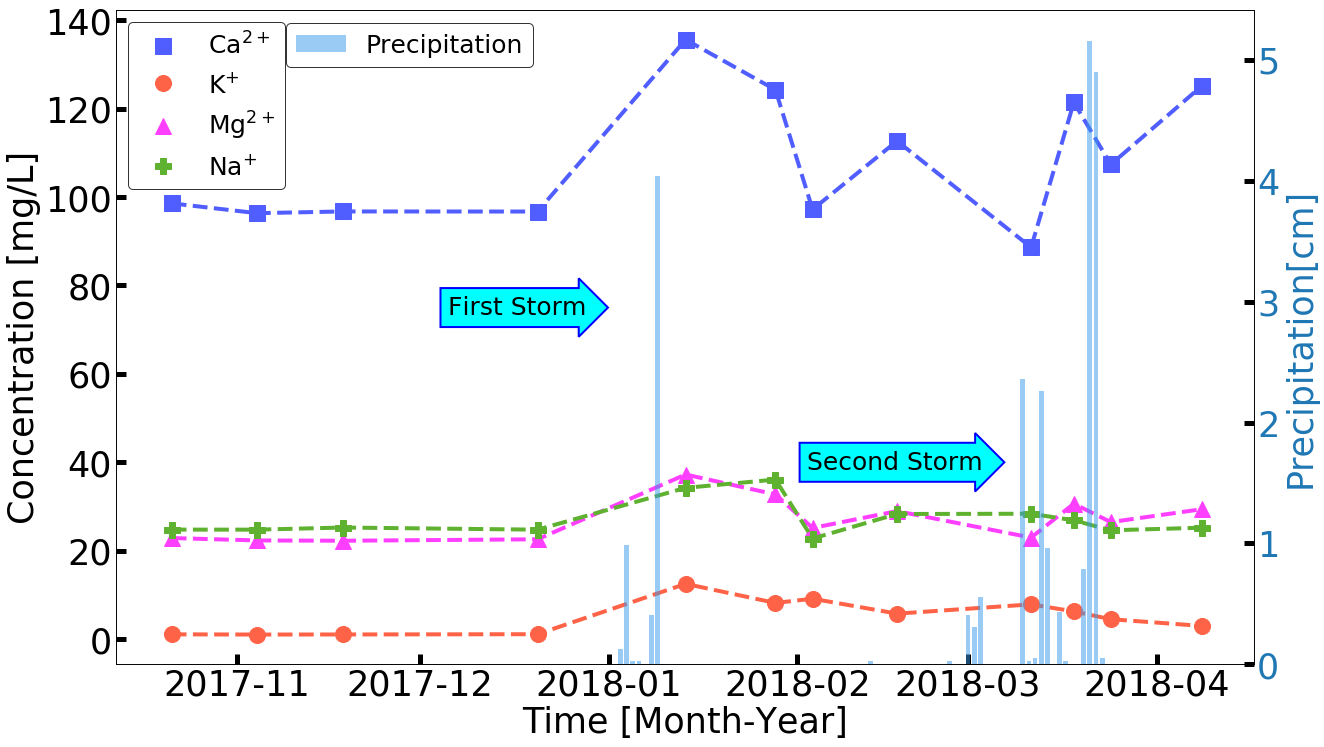

In [2]:
#create plot for cation concentrations
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#plot data 
color = 'tab:red'
ax1.plot(df[df['Site'] == 'U']['DateTime'].tolist(), 
         df[df['Site'] == 'U']['Ca'].tolist(),'--',
         linewidth = 4,
         color = (81/255,94/255,255/255,1))
ax1.plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Ca'].tolist(),'s',markersize = 16,
         color = (81/255,94/255,255/255,1),label = 'Ca$^{2+}$')
ax1.plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['K'].tolist(),'--',linewidth = 4,
         color = (255/255,99/255,71/255,1))
ax1.plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['K'].tolist(),'o',markersize = 16,
         color = (255/255,99/255,71/255,1),label = 'K$^{+}$')
ax1.plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Mg'].tolist(),'--',linewidth = 4,
         color = (255/255,63/255,255/255,1))
ax1.plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Mg'].tolist(),'^',markersize = 16,
         color = (255/255,63/255,255/255,1),label = 'Mg$^{2+}$')
ax1.plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Na'].tolist(),'--',linewidth = 4,
         color = (95/255,177/255,48/255,1))
ax1.plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Na'].tolist(),'P',markersize = 16,
         color = (95/255,177/255,48/255,1),label = 'Na$^{+}$')
#add parameters, labels, and key
ax1.tick_params(axis="x", labelsize=35)
ax1.tick_params(axis="y", labelsize=35)
ax1.tick_params(axis='y')
ax1.set_xlabel('Time [Month-Year]',size = 35)
ax1.set_ylabel('Concentration [mg/L]', size = 35)
ax1.legend(loc = "upper left", prop = {'size': 25},fancybox = True,edgecolor="black")  
ax1.xaxis.set_tick_params(width=5,length = 10,direction = "in") #datetime.datetime(2017, 1, 10)
ax1.yaxis.set_tick_params(width=5,length = 10,direction = "in")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax1.xaxis.set_ticks([736604.0] + list(ax1.get_xticks()))
ax1.tick_params(axis="y", labelsize=35)
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)
#add arrows 
t = ax1.text(datetime(2017, 12, 17), 75, "First Storm", ha="center", va="center", rotation=0,
            size=25,
            bbox=bbox_props)
t = ax1.text(datetime(2018, 2, 17), 40, "Second Storm", ha="center", va="center", rotation=0,
            size=25,
            bbox=bbox_props)
#add second axis for precipitation 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.bar(data['Reading'].tolist(),data['Value'].tolist(), color=(52/255,152/255,235/255,.5),alpha = .5,linewidth = 6,label = 'Precipitation')
ax2.set_ylabel('Precipitation[cm]', color='tab:blue',size = 35)  
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis="y", labelsize=35)
ax2.legend(bbox_to_anchor=(.378, .999), prop = {'size': 25},fancybox = True,edgecolor="black") 
ax2.xaxis.set_tick_params(width = 5,length = 10,direction = "in")
ax2.yaxis.set_tick_params(width=5,length = 10,direction = "in")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/Figure3.pdf')
plt.show()

Figure 3 : Cation Concentration at Upper El Cap Site. Measured creek water major cation concentrations at Upper El Cap (East Fork) site and compiled local precipitation data contained at this site are from automated sensors, located at (34.4625000,-120.0258000), Elevation: 125 ft. data. Precipitation data contained at this site are from automated sensors, located at (34.4625000,-120.0258000), Elevation: 125 ft. Precipitation events cluster into two major storms, referred to as the first major storm (01/06/2018) and the second major storm (03/10/2018) of the season. Major cation concentrations increase following the first major storm of the season. An increased cation concentration was not observed after the second major storm.

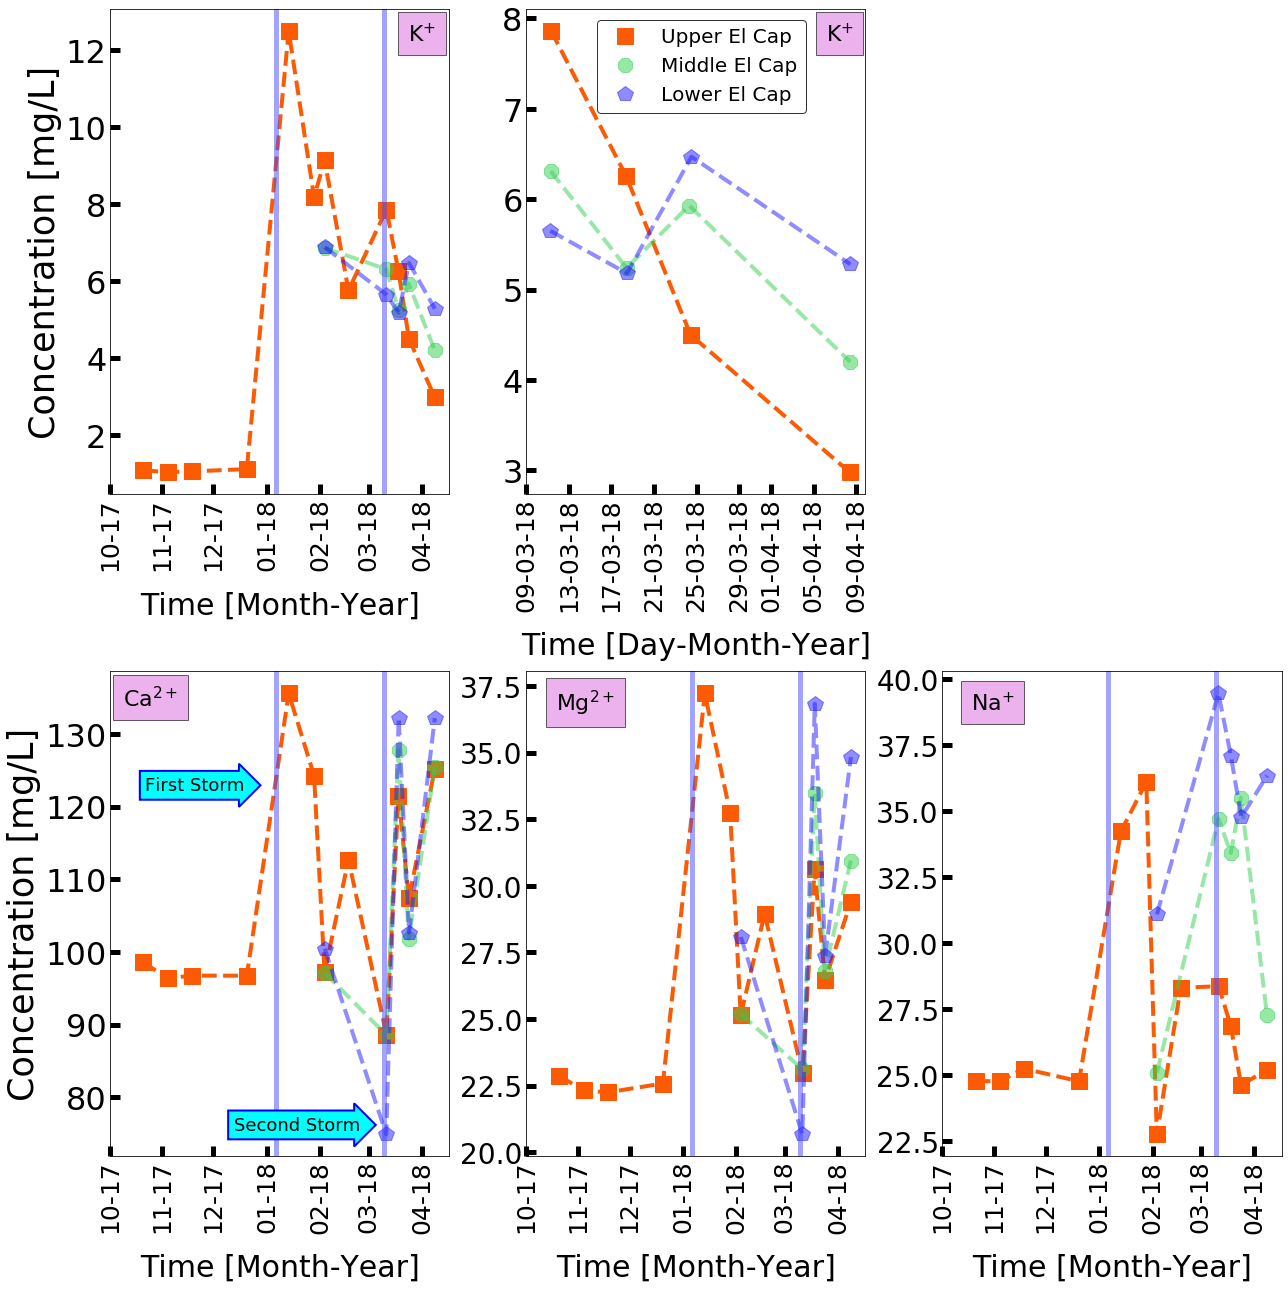

In [130]:
#create L shaped figure
fig,ax = plt.subplots(2,3)
fig.set_size_inches(18, 18)
fig.tight_layout() # Or equivalently,  "plt.c"
fig.subplots_adjust(hspace=.35,wspace = .20)
ax[0, 2].axis('off')
#colors for locations
Middle_El_Cap_Color = (51/255, 208/255, 81/255,.5)
#zoomed in section for ax[0, 1]
df_U = df[8:12]
df_M = df[13:17]
df_L = df[18:]
ax[0, 1].plot(df_U['DateTime'].tolist(), df_U['K'].tolist(),'--',linewidth = 4,
         color = (252/255, 90/255, 3/255,1))
ax[0, 1].plot(df_U['DateTime'].tolist(), df_U['K'].tolist(),'s',markersize = 16,
          color = (252/255, 90/255, 3/255,1),label = 'Upper El Cap')
ax[0, 1].plot(df_M['DateTime'].tolist(), df_M['K'].tolist(),'--',linewidth = 4,
         color =   Middle_El_Cap_Color )
ax[0, 1].plot(df_M['DateTime'].tolist(), df_M['K'].tolist(),'8',markersize = 16,
         color =  Middle_El_Cap_Color,label = 'Middle El Cap')
ax[0, 1].plot(df_L['DateTime'].tolist(), df_L['K'].tolist(),'--',linewidth = 4,
         color = (32/255,27/255,255/255,.5))
ax[0, 1].plot(df_L['DateTime'].tolist(), df_L['K'].tolist(),'p',markersize = 16,
         color = (32/255,27/255,255/255,.5),label = 'Lower El Cap')
red_patch = mpatches.Patch(color='black', label='K^{+}')
ax[0, 1].tick_params(axis="y", labelsize=32,length = 10, width = 5, direction = "in")
ax[0, 1].tick_params(axis="x", labelsize=25,rotation = 90,length = 10, width = 5, direction = "in")
ax[0, 1].set_xlabel('Time [Day-Month-Year]', size=30,labelpad=20)
ax[0, 1].legend(bbox_to_anchor=(.18, .999), loc = "upper left", prop = {'size': 20},fancybox = True,edgecolor = 'black') 
ax[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax[0, 1].text(2.15, .95, 'K$^{+}$', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 22, bbox ={'facecolor':(224/255,128/255,228/255,.5), 
                'alpha':0.6, 
                'pad':10}) 
ax[0,1].xaxis.set_ticks([736762.0] + list(ax[0,1].get_xticks()))
#section ax[0, 0]
ax[0, 0].plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['K'].tolist(),'--',linewidth = 4,
         color = (252/255, 90/255, 3/255,1))
ax[0, 0].plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['K'].tolist(),'s',markersize = 16,
          color = (252/255, 90/255, 3/255,1),label = 'Upper El Cap')
ax[0, 0].plot(df[df['Site'] == 'M']['DateTime'].tolist(), df[df['Site'] == 'M']['K'].tolist(),'--',linewidth = 4,
         color =   Middle_El_Cap_Color)
ax[0, 0].plot(df[df['Site'] == 'M']['DateTime'].tolist(), df[df['Site'] == 'M']['K'].tolist(),'8',markersize = 16,
         color =  Middle_El_Cap_Color,label = 'Middle El Cap')
ax[0, 0].plot(df[df['Site'] == 'L']['DateTime'].tolist(), df[df['Site'] == 'L']['K'].tolist(),'--',linewidth = 4,
         color = (32/255,27/255,255/255,.5))
ax[0, 0].plot(df[df['Site'] == 'L']['DateTime'].tolist(), df[df['Site'] == 'L']['K'].tolist(),'p',markersize = 16,
         color = (32/255,27/255,255/255,.5),label = 'Lower El Cap')
red_patch = mpatches.Patch(color='black', label='K^{+}')
ax[0, 0].tick_params(axis="y", labelsize=32,length = 10, width = 5, direction = "in")
ax[0, 0].tick_params(axis="x", labelsize=25,rotation = 90,length = 10, width = 5, direction = "in")
ax[0, 0].set_xlabel('Time [Month-Year]', size=30,labelpad=20)
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax[0, 0].set_ylabel('Concentration [mg/L]', size=35)
ax[0, 0].text(.92, .95, 'K$^{+}$', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 22, bbox ={'facecolor':(224/255,128/255,228/255,.5), 
                'alpha':0.6, 
                'pad':10})
ax[0, 0].axvline(x = datetime(2018, 1, 6, 0, 0, 0, 0),linewidth = 5,color = (71/255,71/255,255/255,.5))
ax[0, 0].axvline(x = datetime(2018, 3, 10, 0, 0, 0, 0),linewidth = 5,color = (71/255,71/255,255/255,.5))
ax[0,0].xaxis.set_ticks([736604.0]+ list(ax[0,0].get_xticks()))
#section ax[-1, 0]
ax[-1, 0].plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Ca'].tolist(),'--',linewidth = 4,
         color = (252/255, 90/255, 3/255,1))
ax[-1, 0].plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Ca'].tolist(),'s',markersize = 16,
          color = (252/255, 90/255, 3/255,1),label = 'Upper El Cap')
ax[-1, 0].plot(df[df['Site'] == 'M']['DateTime'].tolist(), df[df['Site'] == 'M']['Ca'].tolist(),'--',linewidth = 4,
         color =  Middle_El_Cap_Color)
ax[-1, 0].plot(df[df['Site'] == 'M']['DateTime'].tolist(), df[df['Site'] == 'M']['Ca'].tolist(),'8',markersize = 16,
         color =  Middle_El_Cap_Color,label = 'Middle El Cap')
ax[-1, 0].plot(df[df['Site'] == 'L']['DateTime'].tolist(), df[df['Site'] == 'L']['Ca'].tolist(),'--',linewidth = 4,
         color = (32/255,27/255,255/255,.5))
ax[-1, 0].plot(df[df['Site'] == 'L']['DateTime'].tolist(), df[df['Site'] == 'L']['Ca'].tolist(),'p',markersize = 16,
         color = (32/255,27/255,255/255,.5),label = 'Lower El Cap')
red_patch = mpatches.Patch(color='black', label='K^{+}')
ax[-1, 0].tick_params(axis="y", labelsize=32,length = 10, width = 5, direction = "in")
ax[-1, 0].tick_params(axis="x", labelsize=25,rotation = 90,length = 10, width = 5, direction = "in")
ax[-1, 0].set_xlabel('Time [Month-Year]', size=30,labelpad=20)
ax[-1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax[-1, 0].text(.12, -.42, 'Ca$^{2+}$', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 22, bbox ={'facecolor':(224/255,128/255,228/255,.5), 
                'alpha':0.6, 
                'pad':10}) 
ax[-1, 0].set_ylabel('Concentration [mg/L]', size=35)
ax[-1, 0].axvline(x = datetime(2018, 1, 6, 0, 0, 0, 0),linewidth = 5,color = (71/255,71/255,255/255,.5))
ax[-1, 0].axvline(x = datetime(2018, 3, 10, 0, 0, 0, 0),linewidth = 5,color = (71/255,71/255,255/255,.5))
ax[-1, 0].text(.25, -.6, 'First Storm', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 18, bbox = bbox_props) 
ax[-1, 0].text(.55, -1.3, 'Second Storm', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 18, bbox = bbox_props) 
#section ax[-1, 1]
ax[-1, 1].plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Mg'].tolist(),'--',linewidth = 4,
         color = (252/255, 90/255, 3/255,1))
ax[-1, 1].plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Mg'].tolist(),'s',markersize = 16,
          color = (252/255, 90/255, 3/255,1),label = 'Upper El Cap')
ax[-1, 1].plot(df[df['Site'] == 'M']['DateTime'].tolist(), df[df['Site'] == 'M']['Mg'].tolist(),'--',linewidth = 4,
         color =   (51/255, 208/255, 81/255,.5))
ax[-1, 1].plot(df[df['Site'] == 'M']['DateTime'].tolist(), df[df['Site'] == 'M']['Mg'].tolist(),'8',markersize = 16,
         color =  (51/255, 208/255, 81/255,.5),label = 'Middle El Cap')
ax[-1, 1].plot(df[df['Site'] == 'L']['DateTime'].tolist(), df[df['Site'] == 'L']['Mg'].tolist(),'--',linewidth = 4,
         color = (32/255,27/255,255/255,.5))
ax[-1, 1].plot(df[df['Site'] == 'L']['DateTime'].tolist(), df[df['Site'] == 'L']['Mg'].tolist(),'p',markersize = 16,
         color = (32/255,27/255,255/255,.5),label = 'Lower El Cap')
ax[-1, 1].tick_params(axis="y", labelsize=28,length = 10, width = 5, direction = "in")
ax[-1, 1].tick_params(axis="x", labelsize=25,rotation = 90,length = 10, width = 5, direction = "in")
ax[-1, 1].set_xlabel('Time [Month-Year]', size=30,labelpad=20)
ax[-1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax[-1, 1].text(1.40, -.43, 'Mg$^{2+}$', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 22, bbox ={'facecolor':(224/255,128/255,228/255,.5), 
                'alpha':0.6, 
                'pad':10}) 
ax[-1, 1].axvline(x = datetime(2018, 1, 6, 0, 0, 0, 0),linewidth = 5,color = (71/255,71/255,255/255,.5))
ax[-1, 1].axvline(x = datetime(2018, 3, 10, 0, 0, 0, 0),linewidth = 5,color = (71/255,71/255,255/255,.5))
#section ax[-1, 2]
ax[-1, 2].plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Na'].tolist(),'--',linewidth = 4,
         color = (252/255, 90/255, 3/255,1))
ax[-1, 2].plot(df[df['Site'] == 'U']['DateTime'].tolist(), df[df['Site'] == 'U']['Na'].tolist(),'s',markersize = 16,
          color = (252/255, 90/255, 3/255),label = 'Upper El Cap')
ax[-1, 2].plot(df[df['Site'] == 'M']['DateTime'].tolist(), df[df['Site'] == 'M']['Na'].tolist(),'--',linewidth = 4,
         color =   Middle_El_Cap_Color )
ax[-1, 2].plot(df[df['Site'] == 'M']['DateTime'].tolist(), df[df['Site'] == 'M']['Na'].tolist(),'8',markersize = 16,
         color =  Middle_El_Cap_Color ,label = 'Middle El Cap')
ax[-1, 2].plot(df[df['Site'] == 'L']['DateTime'].tolist(), df[df['Site'] == 'L']['Na'].tolist(),'--',linewidth = 4,
         color = (32/255,27/255,255/255,.5))
ax[-1, 2].plot(df[df['Site'] == 'L']['DateTime'].tolist(), df[df['Site'] == 'L']['Na'].tolist(),'p',markersize = 16,
         color = (32/255,27/255,255/255,.5),label = 'Lower El Cap')
ax[-1, 2].tick_params(axis="y", labelsize=28,length = 10, width = 5, direction = "in")
ax[-1, 2].tick_params(axis="x", labelsize=25,rotation = 90,length = 10, width = 5, direction = "in")
ax[-1, 2].set_xlabel('Time [Month-Year]', size=30,labelpad=20)
ax[-1, 2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax[-1, 2].text(2.60, -.43, 'Na$^{+}$', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 22, bbox ={'facecolor': (224/255,128/255,228/255,.5), 
                'alpha':0.6, 
                'pad':10}) 
ax[-1, 2].axvline(x = datetime(2018, 1, 6, 0, 0, 0, 0),linewidth = 5,color = (71/255,71/255,255/255,.5))
ax[-1, 2].axvline(x = datetime(2018, 3, 10, 0, 0, 0, 0),linewidth = 5,color = (71/255,71/255,255/255,.5))
#add origin 
ax[-1,0].xaxis.set_ticks([736604.0] + list(ax1.get_xticks()))
ax[-1,1].xaxis.set_ticks([736604.0] + list(ax1.get_xticks()))
ax[-1,2].xaxis.set_ticks([736604.0] + list(ax1.get_xticks()))
plt.tight_layout()
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/Figure5.pdf')


Figure 5. Concentrations of major cations in El Capitan creek by sampling site. The data recorded for site Upper El Cap begins prior to the first storm (01/06/2018). For the Middle and Lower El Cap sites follows the second rain fall storm of the season from 03/11/18 to 04/08/2018. 

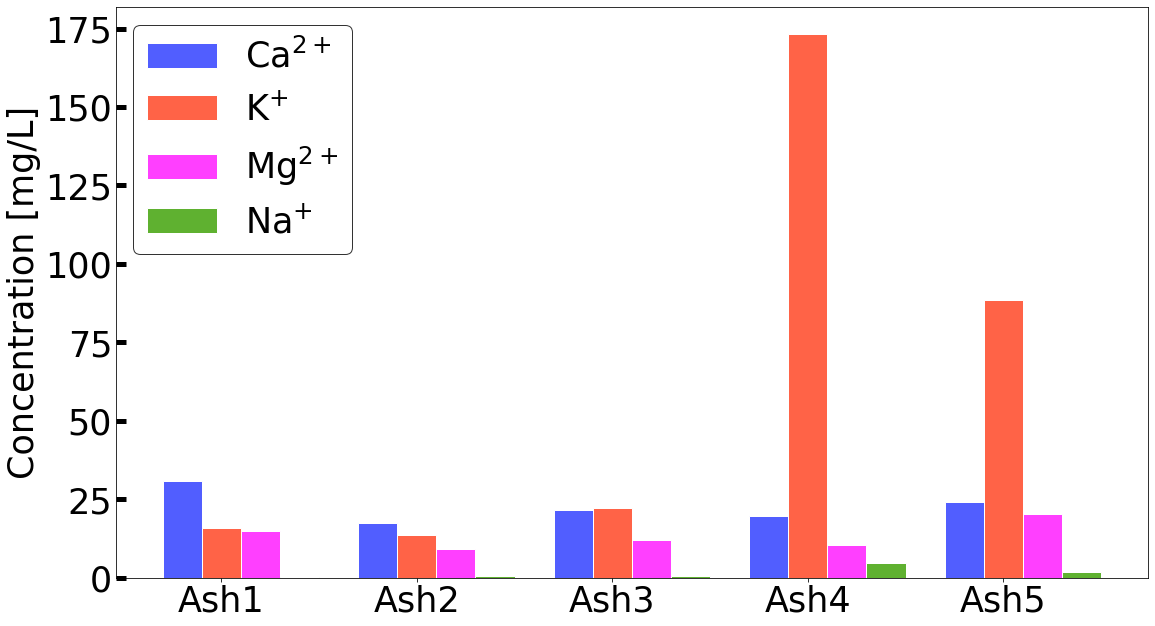

In [131]:
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# set width of bar
barWidth = 0.20
# set height of bar
Ca = df2['Ca'].tolist()
K = df2['K'].tolist()
Mg = df2['Mg'].tolist()
Na = df2['Na'].tolist()
# Set position of bar on X axis
r1 = np.arange(len(Ca))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# Make the plot
plt.bar(r1, Ca, color=(81/255,94/255,255/255,1), width=barWidth, edgecolor='white', label='Ca$^{2+}$')
plt.bar(r2, K, color=(255/255,99/255,71/255,1), width=barWidth, edgecolor='white', label='K$^{+}$')
plt.bar(r3, Mg, color=(255/255,63/255,255/255,1), width=barWidth, edgecolor='white', label='Mg$^{2+}$')
plt.bar(r4, Na, color=(95/255,177/255,48/255,1), width=barWidth, edgecolor='white', label='Na$^{+}$')
plt.xticks([r + barWidth for r in range(len(Ca))], ['Ash1', 'Ash2', 'Ash3', 'Ash4', 'Ash5'])
plt.xticks(size = 35)
ax1.tick_params(axis="y", labelsize=35)
ax1.set_ylabel('Concentration [mg/L]', size = 35)
plt.xticks([r + barWidth for r in range(len(Ca))], ['Ash1', 'Ash2', 'Ash3', 'Ash4', 'Ash5'])
ax1.legend(loc = "upper left", prop = {'size': 35},fancybox = True,edgecolor="black")  
ax1.yaxis.set_tick_params(width=5,length = 10,direction = "in")
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/Figure2.pdf')

Figure 2. Major cation concentrations leached from ash via rainwater by sampling site.

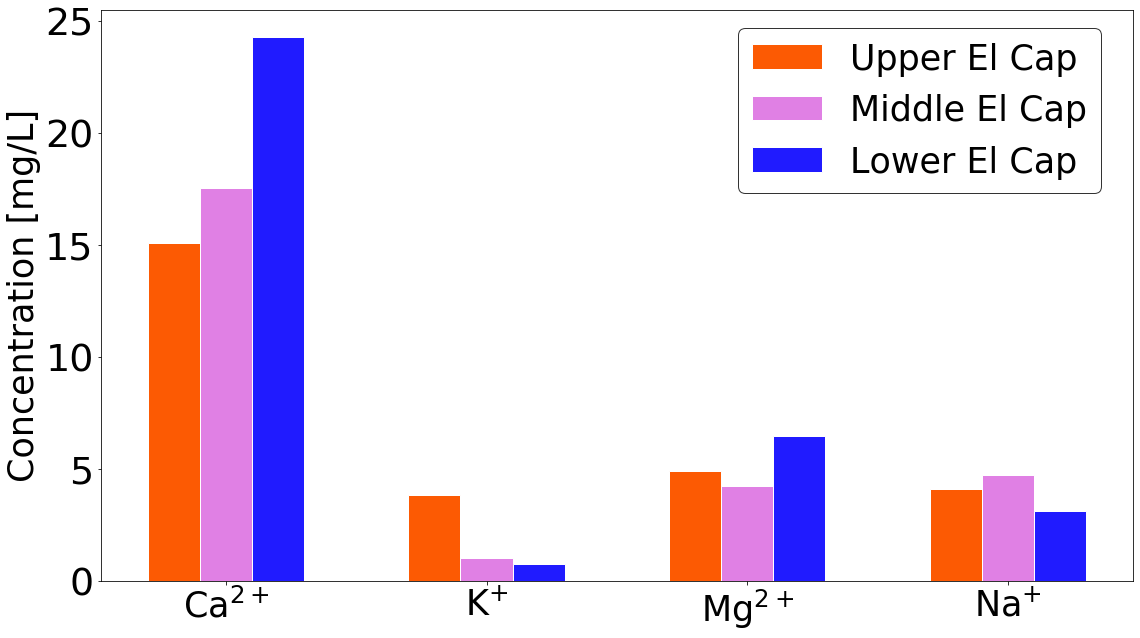

In [132]:
#create figure
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# set width of bar
barWidth = 0.20
df_R = df[8:]
# set height of bar
Ca_U = statistics.stdev(df[df['Site'] == 'U']['Ca'].tolist())
K_U  = statistics.stdev(df[df['Site'] == 'U']['K'].tolist())
Mg_U = statistics.stdev(df[df['Site'] == 'U']['Mg'].tolist()) 
Na_U = statistics.stdev(df[df['Site'] == 'U']['Na'].tolist())
Ca_M = statistics.stdev(df[df['Site'] == 'M']['Ca'].tolist())
K_M  = statistics.stdev(df[df['Site'] == 'M']['K'].tolist())
Mg_M = statistics.stdev(df[df['Site'] == 'M']['Mg'].tolist())
Na_M = statistics.stdev(df[df['Site'] == 'M']['Na'].tolist())
Ca_L = statistics.stdev(df[df['Site'] == 'L']['Ca'].tolist()) 
K_L  = statistics.stdev(df[df['Site'] == 'L']['K'].tolist())
Mg_L = statistics.stdev(df[df['Site'] == 'L']['Mg'].tolist())
Na_L = statistics.stdev(df[df['Site'] == 'L']['Na'].tolist())
Ca = [Ca_U,K_U,Mg_U,Na_U]
K  = [Ca_M,K_M,Mg_M,Na_M]
Mg = [Ca_L,K_L,Mg_L,Na_L]
# Set position of bar on X axis
r1 = np.arange(len(Ca))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plot
plt.bar(r1, Ca, color=(252/255, 90/255, 3/255,1), width=barWidth, edgecolor='white', label='Upper El Cap')
plt.bar(r2, K, color=(224/255,128/255,228/255,1), width=barWidth, edgecolor='white', label='Middle El Cap')
plt.bar(r3, Mg, color=(32/255,27/255,255/255,1), width=barWidth, edgecolor='white', label='Lower El Cap')
# Add xticks on the middle of the group bars
plt.xticks(size = 35)
plt.yticks(size = 38)
plt.ylabel('Concentration [mg/L]', size=35)
#plt.title('Standard Deviation for Ash Cation Concentration', size=35)
plt.xticks([r + barWidth for r in range(len(Ca))], ['Ca$^{2+}$', 'K$^{+}$', 'Mg$^{2+}$', 'Na$^{+}$'])
plt.legend(bbox_to_anchor=(.6, .999),loc = "upper left", prop = {'size': 35},fancybox = True,edgecolor = "black") 
# Create legend & Show graphic
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/FigureS7.pdf')
plt.show()

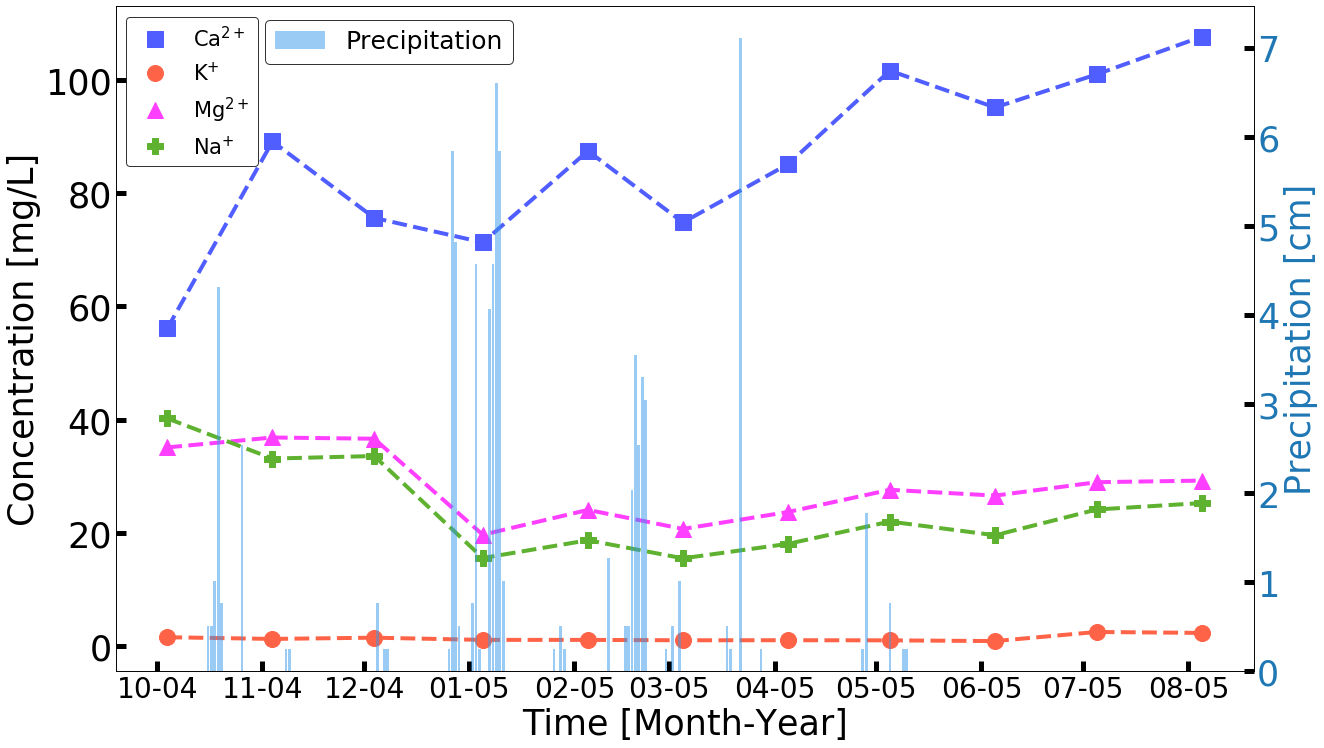

In [133]:
#create plot
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
color = 'tab:red'
#plot data
ax1.plot(df3['DateTime'].tolist(), 
         df3['Ca'].tolist(),'--',
         linewidth = 4,
         color = (81/255,94/255,255/255,1))
ax1.plot(df3['DateTime'].tolist(), 
         df3['Ca'].tolist(),'s',markersize = 16,
         color = (81/255,94/255,255/255,1),label = 'Ca$^{2+}$')
ax1.plot(df3['DateTime'].tolist(), 
         df3['K'].tolist(),'--',
         linewidth = 4,
         color = (255/255,99/255,71/255,1))
ax1.plot(df3['DateTime'].tolist(), 
         df3['K'].tolist(),'o',markersize = 16,
         color = (255/255,99/255,71/255,1),label = 'K$^{+}$')
ax1.plot(df3['DateTime'].tolist(), 
         df3['Mg'].tolist(),'--',
         linewidth = 4,
         color = (255/255,63/255,255/255,1))
ax1.plot(df3['DateTime'].tolist(), 
         df3['Mg'].tolist(),'^',markersize = 16,
         color = (255/255,63/255,255/255,1),label = 'Mg$^{2+}$')
ax1.plot(df3['DateTime'].tolist(), 
         df3['Na'].tolist(),'--',
         linewidth = 4,
         color = (95/255,177/255,48/255,1))
ax1.plot(df3['DateTime'].tolist(), 
         df3['Na'].tolist(),'P',markersize = 16,
         color = (95/255,177/255,48/255,1),label = 'Na$^{+}$')
ax1.tick_params(axis="x", labelsize=28)
ax1.tick_params(axis="y", labelsize=35)
ax1.tick_params(axis='y')
ax1.set_xlabel('Time [Month-Year]',size = 35)
ax1.set_ylabel('Concentration [mg/L]', size = 35)
ax1.legend(loc = "upper left", prop = {'size': 21},fancybox = True,edgecolor = 'black')  
ax1.xaxis.set_tick_params(width = 5,length = 10,direction = "in")
ax1.yaxis.set_tick_params(width=5,length = 10,direction = "in")
ax1.tick_params(axis="y", labelsize=35)
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)
#create an axis for the precipitation data
color = 'tab:green'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar(data2['DATE'].tolist(),data2['HPCP'].tolist(), color=(52/255,152/255,235/255,.5),alpha = .5,linewidth = 25,label = 'Precipitation')
ax2.set_ylabel('Precipitation [cm]', color='tab:blue',size = 35)  
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis="y", labelsize=35)
ax2.legend(bbox_to_anchor=(.360, .999), prop = {'size': 25},fancybox = True,edgecolor = 'black') 
ax2.xaxis.set_tick_params(width = 5,length = 10,direction = "in")
ax2.yaxis.set_tick_params(width=5,length = 10,direction = "in")
#plot figure and change x-axis date format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/Figure7.pdf')
plt.show()

Figure 7 : Cation Concentration at Rattlesnake Canyon. Rattlesnake Creek (control site) measured creek water cation concentrations compared with local precipitation.

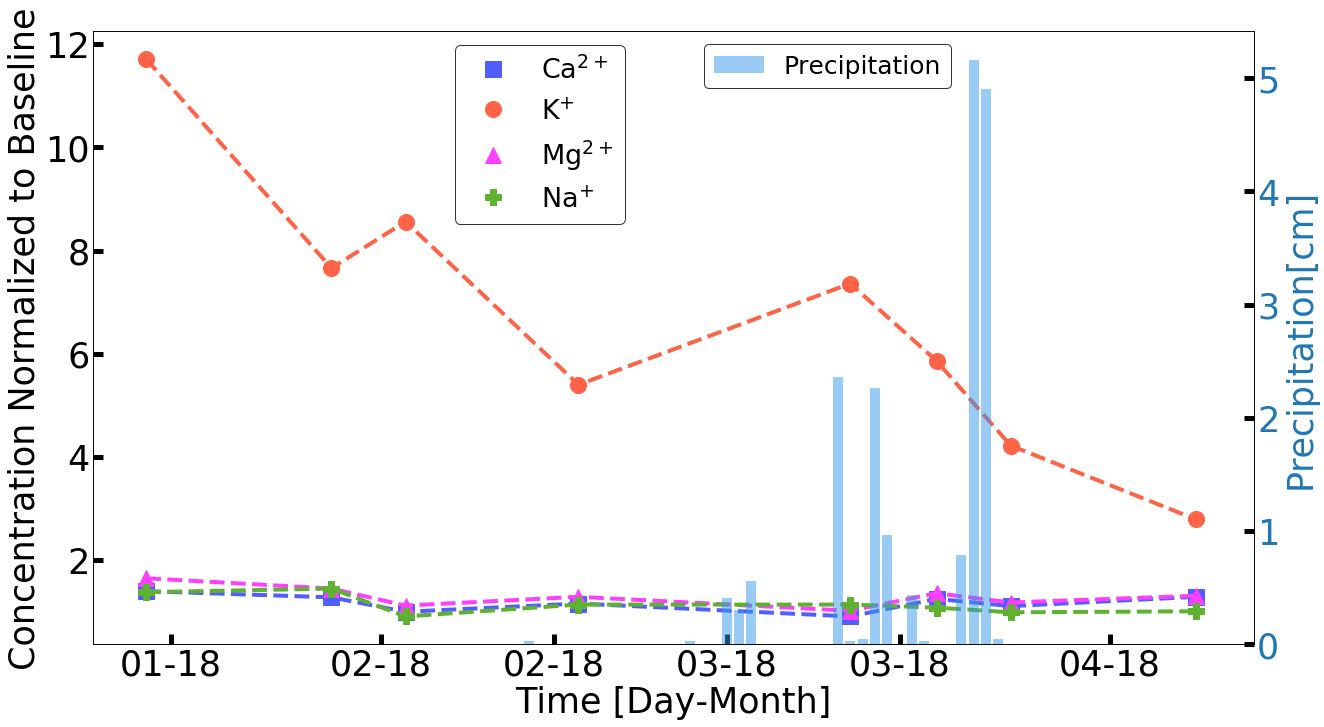

In [134]:
#create figure
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
#add axis for cation data 
color = 'tab:red'
ax1.plot(df4['DateTime'].tolist(), 
         df4['Ca'].tolist(),'--',
         linewidth = 4,
         color = (81/255,94/255,255/255,1))
ax1.plot(df4['DateTime'].tolist(), 
         df4['Ca'].tolist(),'s',markersize = 16,
         color = (81/255,94/255,255/255,1),label = 'Ca$^{2+}$')
ax1.plot(df4['DateTime'].tolist(), 
         df4['K'].tolist(),'--',
         linewidth = 4,
         color = (255/255,99/255,71/255,1))
ax1.plot(df4['DateTime'].tolist(), 
         df4['K'].tolist(),'o',markersize = 16,
         color = (255/255,99/255,71/255,1),label = 'K$^{+}$')
ax1.plot(df4['DateTime'].tolist(), 
         df4['Mg'].tolist(),'--',
         linewidth = 4,
         color = (255/255,63/255,255/255,1))
ax1.plot(df4['DateTime'].tolist(), 
         df4['Mg'].tolist(),'^',markersize = 16,
         color = (255/255,63/255,255/255,1),label = 'Mg$^{2+}$')
ax1.plot(df4['DateTime'].tolist(), 
         df4['Na'].tolist(),'--',
         linewidth = 4,
         color = (95/255,177/255,48/255,1))
ax1.plot(df4['DateTime'].tolist(), 
         df4['Na'].tolist(),'P',markersize = 16,
         color = (95/255,177/255,48/255,1),label = 'Na$^{+}$')
ax1.tick_params(axis="x", labelsize=35)
ax1.tick_params(axis="y", labelsize=35)
ax1.tick_params(axis='y')
ax1.set_xlabel('Time [Day-Month]',size = 35)
ax1.set_ylabel('Concentration Normalized to Baseline', size = 35)
ax1.legend(bbox_to_anchor=(.3, .999),loc = "upper left", prop = {'size': 27},fancybox = True,edgecolor = 'black')  
ax1.xaxis.set_tick_params(width = 5,length = 10,direction = "in")
ax1.yaxis.set_tick_params(width=5,length = 10,direction = "in")
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)
#add precipiation axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#we already handled the x-label with ax1
ax2.bar(data['Reading'].tolist()[100:],data['Value'].tolist()[100:], color=(52/255,152/255,235/255,.5),alpha = .5,linewidth = 15,
        label = 'Precipitation')             
ax2.set_ylabel('Precipitation[cm]', color='tab:blue',size = 35)  
ax1.tick_params(axis="y", labelsize=35)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis="y", labelsize=35)
ax2.legend(bbox_to_anchor=(.75, .999), prop = {'size': 25},fancybox = True,edgecolor = 'black') 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax2.xaxis.set_tick_params(width = 5,length = 10,direction = "in")
ax2.yaxis.set_tick_params(width=5,length = 10,direction = "in")
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/Figure4.pdf')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Figure 4.Creek water measurements normalized by pre-storm values. Major cation concentrations at Upper El Cap (East Fork) site following the first major precipitations event for the season normalized to mean pre-storm baseline concentrations. Precipitation data contained at this site are from automated sensors, located at (34.4625000,-120.0258000), Elevation: 125 ft. 

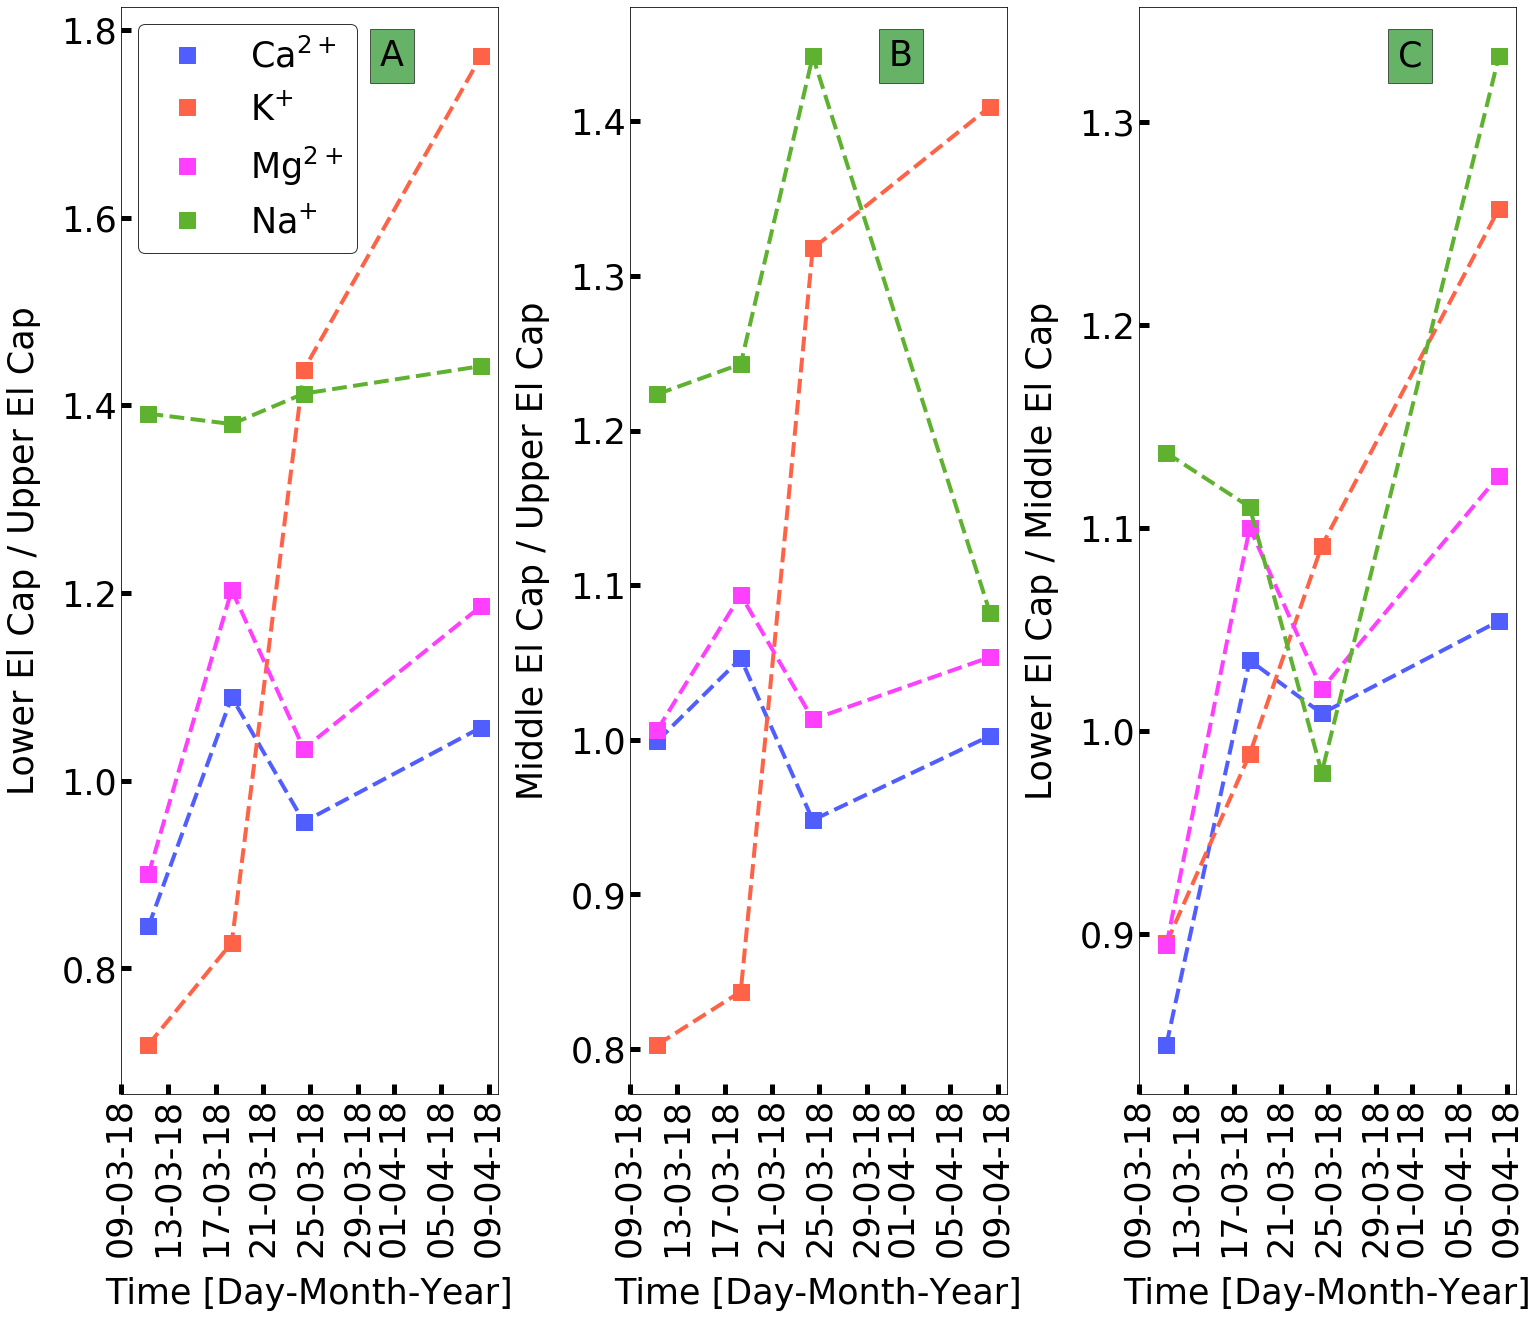

In [135]:
#create figure
fig,ax = plt.subplots(1,3)
fig.set_size_inches(25, 20)
fig.subplots_adjust(wspace = .35)
#create ax[0]
Ca = [y/x for x, y in zip(df[8:12]['Ca'].tolist(),df[18:]['Ca'].tolist())]
K = [y/x for x, y in zip(df[8:12]['K'].tolist(),df[18:]['K'].tolist())]
Mg = [y/x for x, y in zip(df[8:12]['Mg'].tolist(),df[18:]['Mg'].tolist())]
Na = [y/x for x, y in zip(df[8:12]['Na'].tolist(),df[18:]['Na'].tolist())]

ax[0].plot(df[8:12]['DateTime'].tolist(), Ca,'--',linewidth = 4,
         color = (81/255,94/255,255/255,1))
ax[0].plot(df[8:12]['DateTime'].tolist(), Ca,'s',markersize = 16,
         color = (81/255,94/255,255/255,1),label = 'Ca$^{2+}$')

ax[0].plot(df[8:12]['DateTime'].tolist(), K,'--',linewidth = 4,
         color = (255/255,99/255,71/255,1))
ax[0].plot(df[8:12]['DateTime'].tolist(), K,'s',markersize = 16,
         color = (255/255,99/255,71/255,1),label = 'K$^{+}$')

ax[0].plot(df[8:12]['DateTime'].tolist(), Mg,'--',linewidth = 4,
         color = (255/255,63/255,255/255,1))
ax[0].plot(df[8:12]['DateTime'].tolist(), Mg,'s',markersize = 16,
         color = (255/255,63/255,255/255,1),label = 'Mg$^{2+}$')

ax[0].plot(df[8:12]['DateTime'].tolist(), Na,'--',linewidth = 4,
         color = (95/255,177/255,48/255,1))
ax[0].plot(df[8:12]['DateTime'].tolist(), Na,'s',markersize = 16,
         color = (95/255,177/255,48/255,1),label = 'Na$^{+}$')
ax[0].tick_params(axis="y", labelsize=35,length = 10, width = 5, direction = "in")
ax[0].tick_params(axis="x", labelsize=35,rotation = 90,length = 10, width = 5, direction = "in")
ax[0].set_xlabel('Time [Day-Month-Year]', size=35,labelpad=20)
ax[0].set_ylabel('Lower El Cap / Upper El Cap', size=35,labelpad=20)
#ax1.title('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax[0].legend(loc = "upper left", prop = {'size': 35},fancybox = True,edgecolor = 'black')
ax[0].text(.72, .955, 'A', horizontalalignment='center',
             verticalalignment='center', transform=ax[0].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
#create ax[1]
Ca = [y/x for x, y in zip(df[8:12]['Ca'].tolist(),df[13:17]['Ca'].tolist())]
K = [y/x for x, y in zip(df[8:12]['K'].tolist(),df[13:17]['K'].tolist())]
Mg = [y/x for x, y in zip(df[8:12]['Mg'].tolist(),df[13:17]['Mg'].tolist())]
Na = [y/x for x, y in zip(df[8:12]['Na'].tolist(),df[13:17]['Na'].tolist())]
ax[1].plot(df[8:12]['DateTime'].tolist(), Ca,'--',linewidth = 4,
         color = (81/255,94/255,255/255,1))
ax[1].plot(df[8:12]['DateTime'].tolist(), Ca,'s',markersize = 16,
         color = (81/255,94/255,255/255,1),label = '$Ca^{2+}$')

ax[1].plot(df[8:12]['DateTime'].tolist(), K,'--',linewidth = 4,
         color = (255/255,99/255,71/255,1))
ax[1].plot(df[8:12]['DateTime'].tolist(), K,'s',markersize = 16,
         color = (255/255,99/255,71/255,1),label = '$K^{+}$')

ax[1].plot(df[8:12]['DateTime'].tolist(), Mg,'--',linewidth = 4,
         color = (255/255,63/255,255/255,1))
ax[1].plot(df[8:12]['DateTime'].tolist(), Mg,'s',markersize = 16,
         color = (255/255,63/255,255/255,1),label = '$Mg^{2+}$')

ax[1].plot(df[8:12]['DateTime'].tolist(), Na,'--',linewidth = 4,
         color = (95/255,177/255,48/255,1))
ax[1].plot(df[8:12]['DateTime'].tolist(), Na,'s',markersize = 16,
         color = (95/255,177/255,48/255,1),label = '$Na^{+}$')
ax[1].tick_params(axis="y", labelsize=35,length = 10, width = 5, direction = "in")
ax[1].tick_params(axis="x", labelsize=35,rotation = 90,length = 10, width = 5, direction = "in")
ax[1].set_xlabel('Time [Day-Month-Year]', size=35,labelpad=20)
ax[1].set_ylabel('Middle El Cap / Upper El Cap', size=35,labelpad=20)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax[1].text(.72, .955, 'B', horizontalalignment='center',
             verticalalignment='center', transform=ax[1].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
#create ax[2]
Ca = [y/x for x, y in zip(df[13:17]['Ca'].tolist(),df[18:]['Ca'].tolist())]
K = [y/x for x, y in zip(df[13:17]['K'].tolist(),df[18:]['K'].tolist())]
Mg = [y/x for x, y in zip(df[13:17]['Mg'].tolist(),df[18:]['Mg'].tolist())]
Na = [y/x for x, y in zip(df[13:17]['Na'].tolist(),df[18:]['Na'].tolist())]
ax[2].plot(df[8:12]['DateTime'].tolist(), Ca,'--',linewidth = 4,
         color = (81/255,94/255,255/255,1))
ax[2].plot(df[8:12]['DateTime'].tolist(), Ca,'s',markersize = 16,
         color = (81/255,94/255,255/255,1),label = "$Ca^{2+}$")

ax[2].plot(df[8:12]['DateTime'].tolist(), K,'--',linewidth = 4,
         color = (255/255,99/255,71/255,1))
ax[2].plot(df[8:12]['DateTime'].tolist(), K,'s',markersize = 16,
         color = (255/255,99/255,71/255,1),label = '$K^{+}$')

ax[2].plot(df[8:12]['DateTime'].tolist(), Mg,'--',linewidth = 4,
         color = (255/255,63/255,255/255,1))
ax[2].plot(df[8:12]['DateTime'].tolist(), Mg,'s',markersize = 16,
         color = (255/255,63/255,255/255,1),label = '$Mg^{2+}$')

ax[2].plot(df[8:12]['DateTime'].tolist(), Na,'--',linewidth = 4,
         color = (95/255,177/255,48/255,1))
ax[2].plot(df[8:12]['DateTime'].tolist(), Na,'s',markersize = 16,
         color = (95/255,177/255,48/255,1),label = '$Na^{+}$')
ax[2].tick_params(axis="y", labelsize=35,length = 10, width = 5, direction = "in")
ax[2].tick_params(axis="x", labelsize=35,rotation = 90,length = 10, width = 5, direction = "in")
ax[2].set_xlabel('Time [Day-Month-Year]', size=35,labelpad=20)
ax[2].set_ylabel('Lower El Cap / Middle El Cap', size=35,labelpad=20)
#ax1.title('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax[2].text(.72, .955, 'C', horizontalalignment='center',
             verticalalignment='center', transform=ax[2].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
#add origin 
ax[0].xaxis.set_ticks([736762] + list(ax[0].get_xticks()))
ax[1].xaxis.set_ticks([736762] + list(ax[1].get_xticks()))
ax[2].xaxis.set_ticks([736762] + list(ax[2].get_xticks()))
#plot
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/Figure7.pdf')
plt.show()

Figure 6. Varariations of major cation concentration across the three sampling sites. Each plot illustrates results from one of the three sites sampled along the El Capitan Creek transect normalized to concentrations of the same major cation sampled at another downstream site on the same day. The results illustrate how concentrations of major cations change proportionally over time (y-value > 1 implies higher downstream; < 1 implies lower downstream; = 1 implies no change). Figure 11A normalizes concentrations in the Lower El Cap site to those of the Upper El Cap (East Fork) site.  Figure 11B normalizes concentrations in the Middle El Cap Site to those of the Upper El Cap (East Fork) site.  Figure 11C normalizes concentrations in the Lower El Cap site to those of the Middle El Cap site.K+ concentration ratios consistently increase over time with higher upstream values initially (y < 1), and higher downstream values (y > 1) at the end. Dates follow the second major storm of the season.

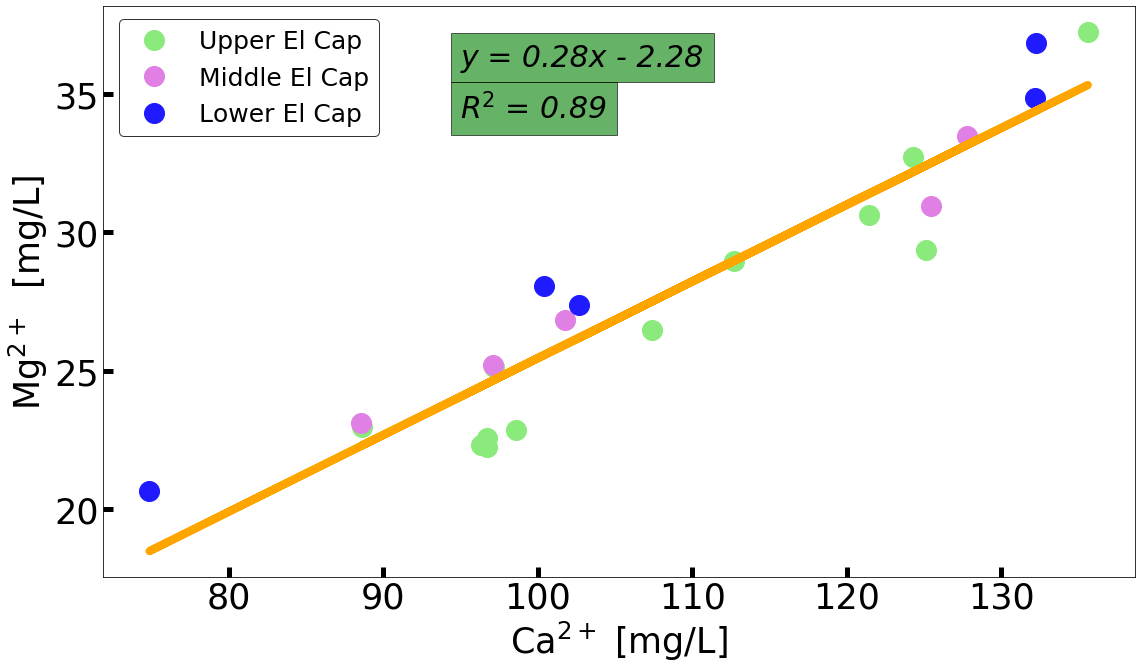

In [136]:
#create figure
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    #Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    return results
#Ca vs. K
x = df['Ca'].tolist()
y = df['Mg'].tolist()
m, b = np.polyfit(x, y, 1)
plt.plot(df[df['Site'] == 'U']['Ca'].tolist(), 
         df[df['Site'] == 'U']['Mg'], 
         'o',
         color = (139/255,234/255,124/255,1),
         markersize = 20,
         label = 'Upper El Cap')
plt.plot(df[df['Site'] == 'M']['Ca'].tolist(), 
         df[df['Site'] == 'M']['Mg'], 
         'o',
         color =  (224/255,128/255,228/255,1),
         markersize = 20,
         label = 'Middle El Cap')
plt.plot(df[df['Site'] == 'L']['Ca'].tolist(), 
         df[df['Site'] == 'L']['Mg'], 
         'o',
         color = (32/255,27/255,255/255,1),
         markersize = 20,
         label ='Lower El Cap')
#create line (y=mx+b)
l =  [(i * m) + b for i in x]
plt.plot(x, l,linewidth = 8,color = 'orange')
results =  polyfit(x, y, 1)
plt.xticks(size = 35)
plt.yticks(size = 35)
plt.xlabel('Ca$^{2+}$ [mg/L]', size=35)
plt.ylabel('Mg$^{2+}$  [mg/L]', size=35)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(95, 36, 
         'y = 0.28x - 2.28', 
         style = 'italic', 
         fontsize = 30, 
         bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
plt.text(95, 34.1, 
         'R$^{2}$ = 0.89', 
         style = 'italic', 
         fontsize = 30, 
         bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10})           
plt.legend(bbox_to_anchor=(.28, .999), prop = {'size': 25},fancybox = True,edgecolor = 'black') 
ax1.tick_params(axis="y", labelsize=35)
ax1.yaxis.set_tick_params(width=5,length = 10,direction = "in")
ax1.tick_params(axis="x", labelsize=35)
ax1.xaxis.set_tick_params(width=5,length = 10,direction = "in")
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/FigureS1.pdf')
plt.show()

Figure S1. Observed linear relationship between concentrations of divalent major cations Ca2+ and Mg2+ in the Upper El Cap, the Middle El Cap, and the Lower El Cap sampling sites. This figure dipsplays all samples collected from El Capitan Creek over the duration of this study. The vertical axis represents the Mg2+ concentration in ppm and the horizontal axis represents the Ca2+ concentration in ppm.

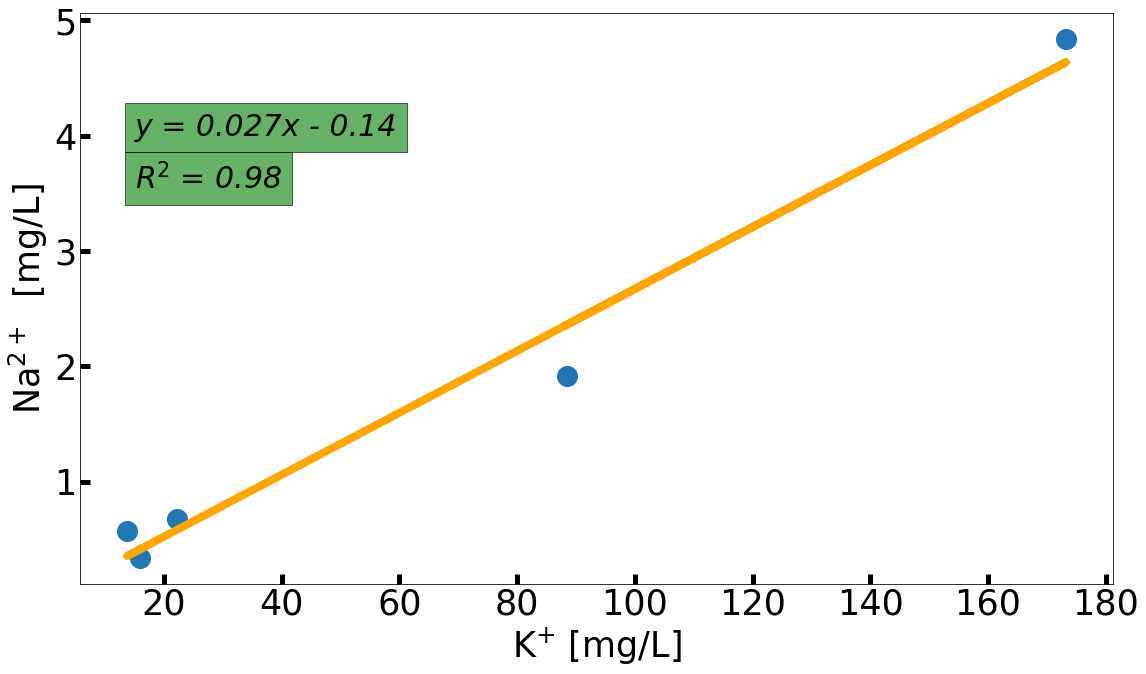

In [137]:
#create figure
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    #Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    return results
#Na vs. K
K = df2['K'].tolist()
Na = df2['Na'].tolist()
m, b = np.polyfit(K, Na, 1)
plt.plot(K, 
         Na, 
         'o',
         markersize = 20,
         label = 'Upper El Cap')
l =  [(i * m) + b for i in K]
plt.plot(K, l,linewidth = 8,color = 'orange')
results =  polyfit(K, Na, 1)
plt.xlabel('K$^{+}$ [mg/L]', size=35)
plt.ylabel('Na$^{2+}$  [mg/L]', size=35)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(15, 4, 
         'y = 0.027x - 0.14', 
         style = 'italic', 
         fontsize = 30, 
         bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 

plt.text(15, 3.54, 
         'R$^{2}$ = 0.98', 
         style = 'italic', 
         fontsize = 30, 
         bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax1.tick_params(axis="y", labelsize=35)
ax1.yaxis.set_tick_params(width=5,length = 10,direction = "in")
ax1.tick_params(axis="x", labelsize=35)
ax1.xaxis.set_tick_params(width=5,length = 10,direction = "in")
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/FigureS2.pdf')
plt.show()

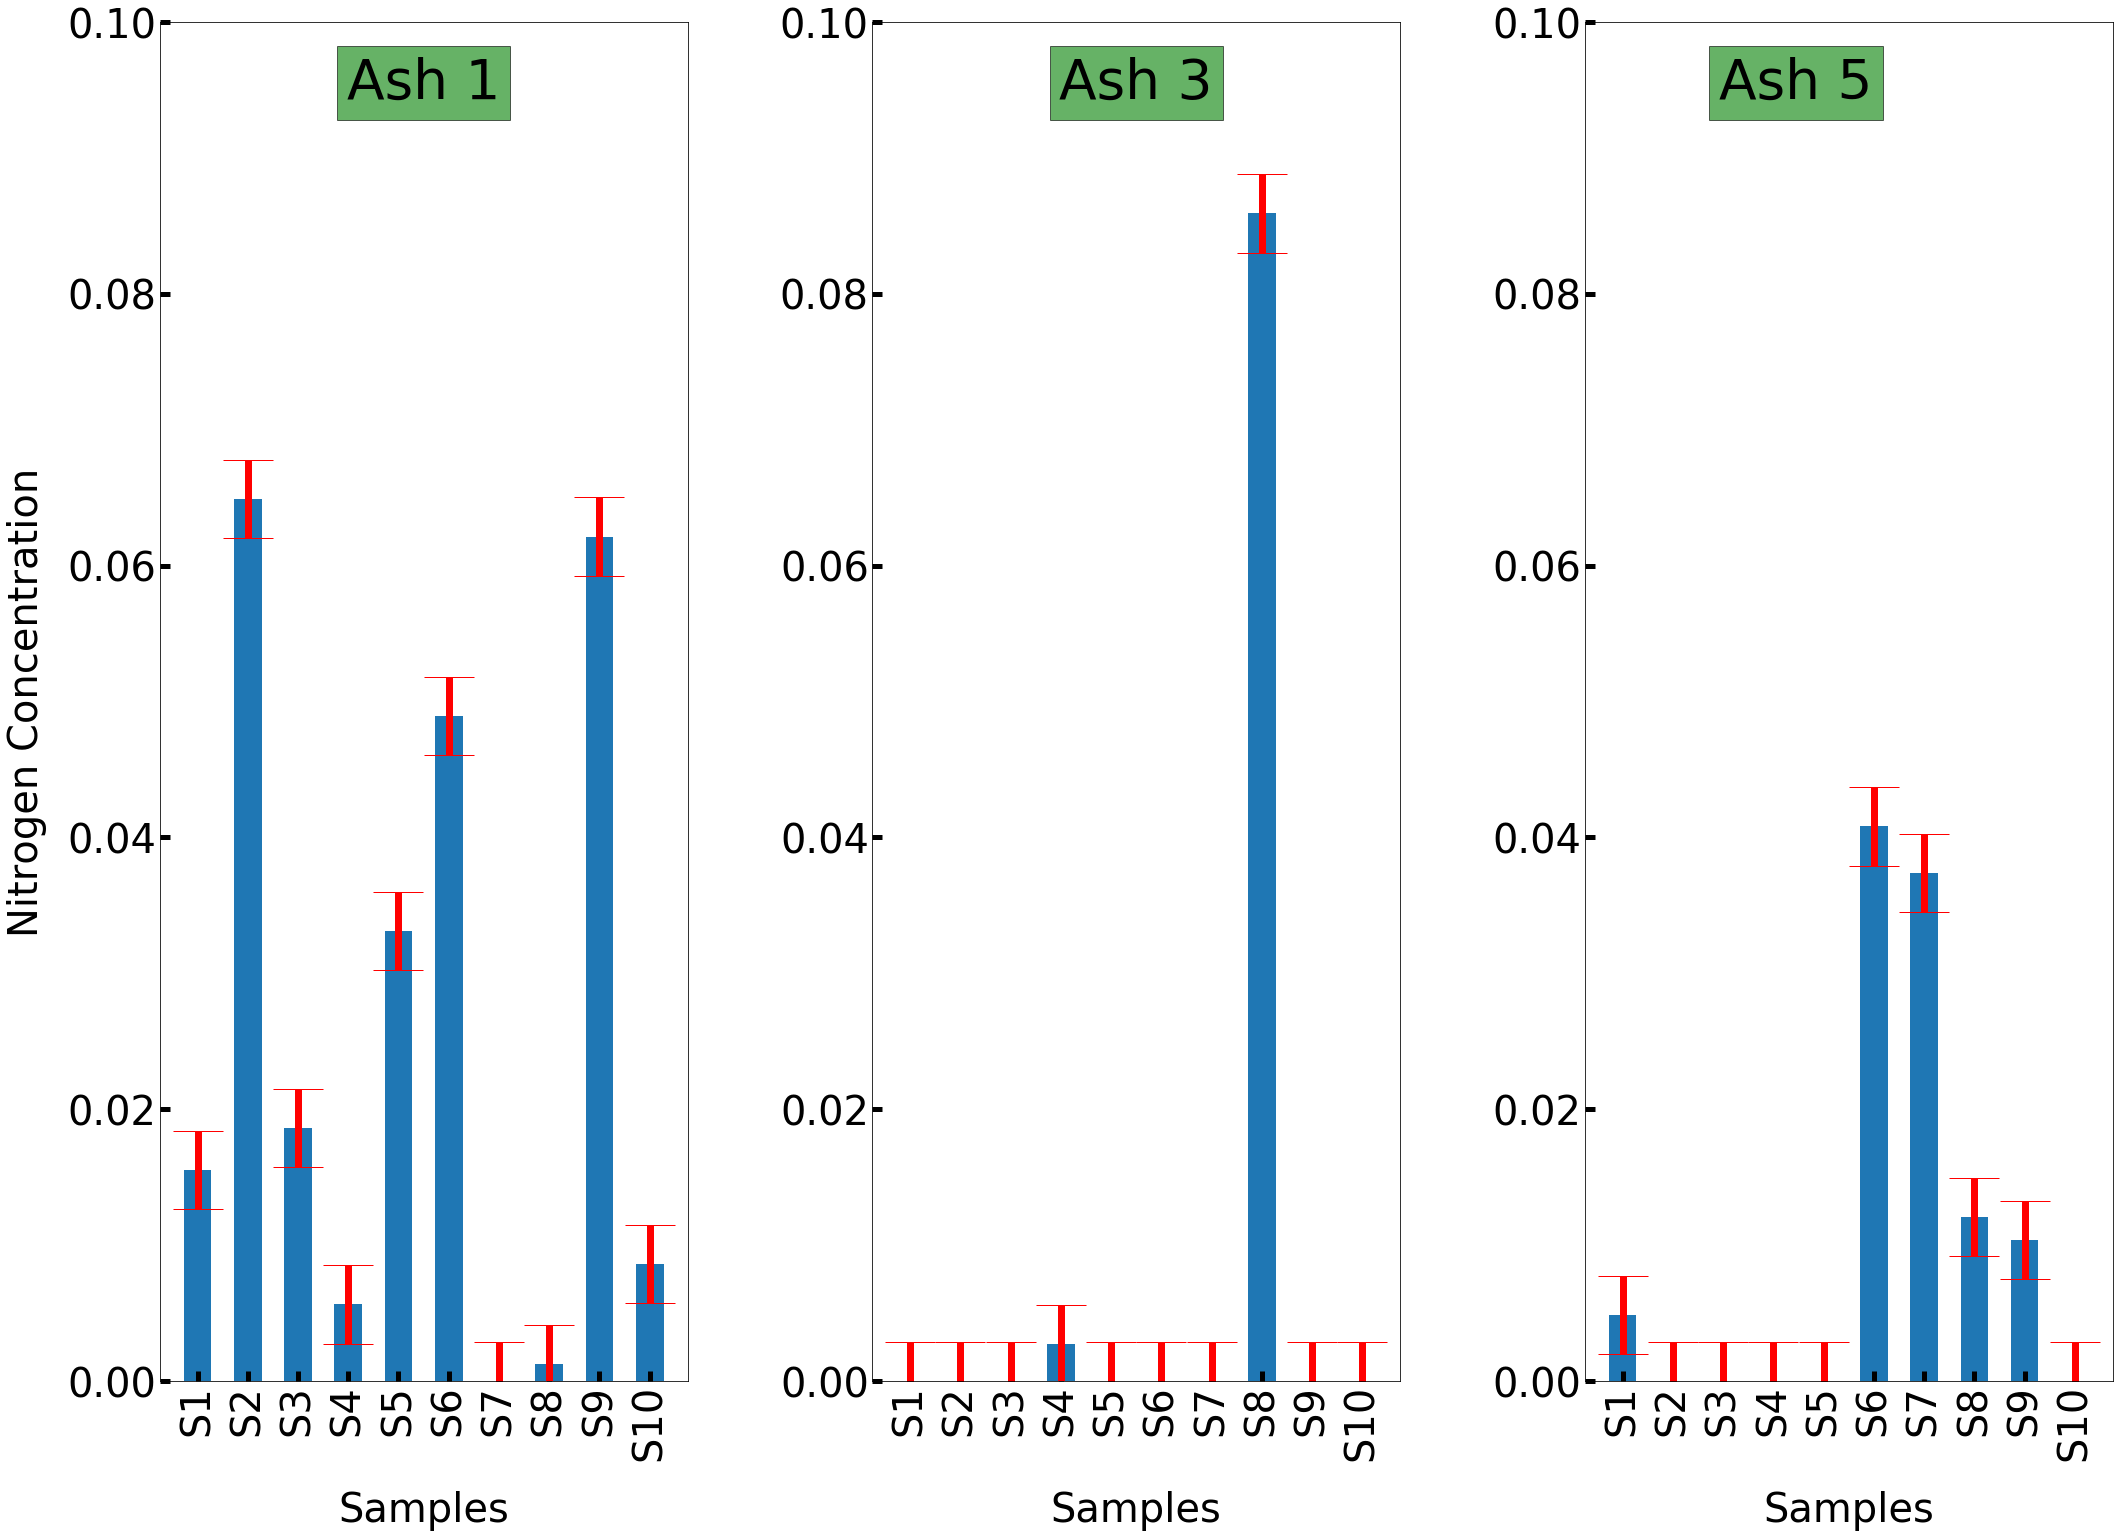

In [138]:
#load data 
df_C = pd.read_csv('C_corrections.csv')
df_N = pd.read_csv('N_corrections.csv')
#create figure
fig,ax = plt.subplots(1,3)
fig.set_size_inches(35, 25)
fig.subplots_adjust(hspace=.35,wspace = .35)
N = 10 
t1 = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7','S8','S9','S10']
ind = np.arange(N)    # the x locations for the groups
width = 0.55       # the width of the bars: can also be len(x) sequence
p1 = ax[0].bar(t1, df_N[40:51]['corrected N'].tolist(), width)
#ax[0]
ax[0].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[0].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[0].set_xlabel('Samples', size=40,labelpad=30)
ax[0].set_ylabel('Nitrogen Concentration', size=40,labelpad=20)
#ax1.title('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[0].text(.50, .955, 'Ash 1', horizontalalignment='center',
             verticalalignment='center', transform=ax[0].transAxes,
             fontsize = 55, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[0].set_ylim(0,.1)
ax[0].errorbar(range(len(t1)), df_N[40:51]['corrected N'].tolist(), yerr = 0.00288, fmt="o", color="r", lw=7,capsize=25)                               
p1 = ax[1].bar(t1,df_N[20:30]['corrected N'].tolist(), width)
#ax[1]
ax[1].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[1].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[1].set_xlabel('Samples', size=40,labelpad=30)
#ax1.title('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[1].text(.50, .955, 'Ash 3', horizontalalignment='center',
             verticalalignment='center', transform=ax[1].transAxes,
             fontsize = 55, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[1].set_ylim(0,.1)
ax[1].errorbar(range(len(t1)), df_N[20:30]['corrected N'].tolist(), yerr = 0.00288, fmt="o", color="r", lw=7,capsize=25)                                                                 
#ax[2]
p1 = ax[2].bar(t1, df_N[0:10]['corrected N'].tolist(), width)
ax[2].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[2].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[2].set_xlabel('Samples', size=40,labelpad=30)
#ax1.title('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[2].text(.40, .955, 'Ash 5', horizontalalignment='center',
             verticalalignment='center', transform=ax[2].transAxes,
             fontsize = 55, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[2].set_ylim(0,.1)
ax[2].errorbar(range(len(t1)), df_N[0:10]['corrected N'].tolist(), yerr = 0.00288, fmt="o", color="r", lw=7,capsize=25)
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/FigureS3.pdf')
plt.show()

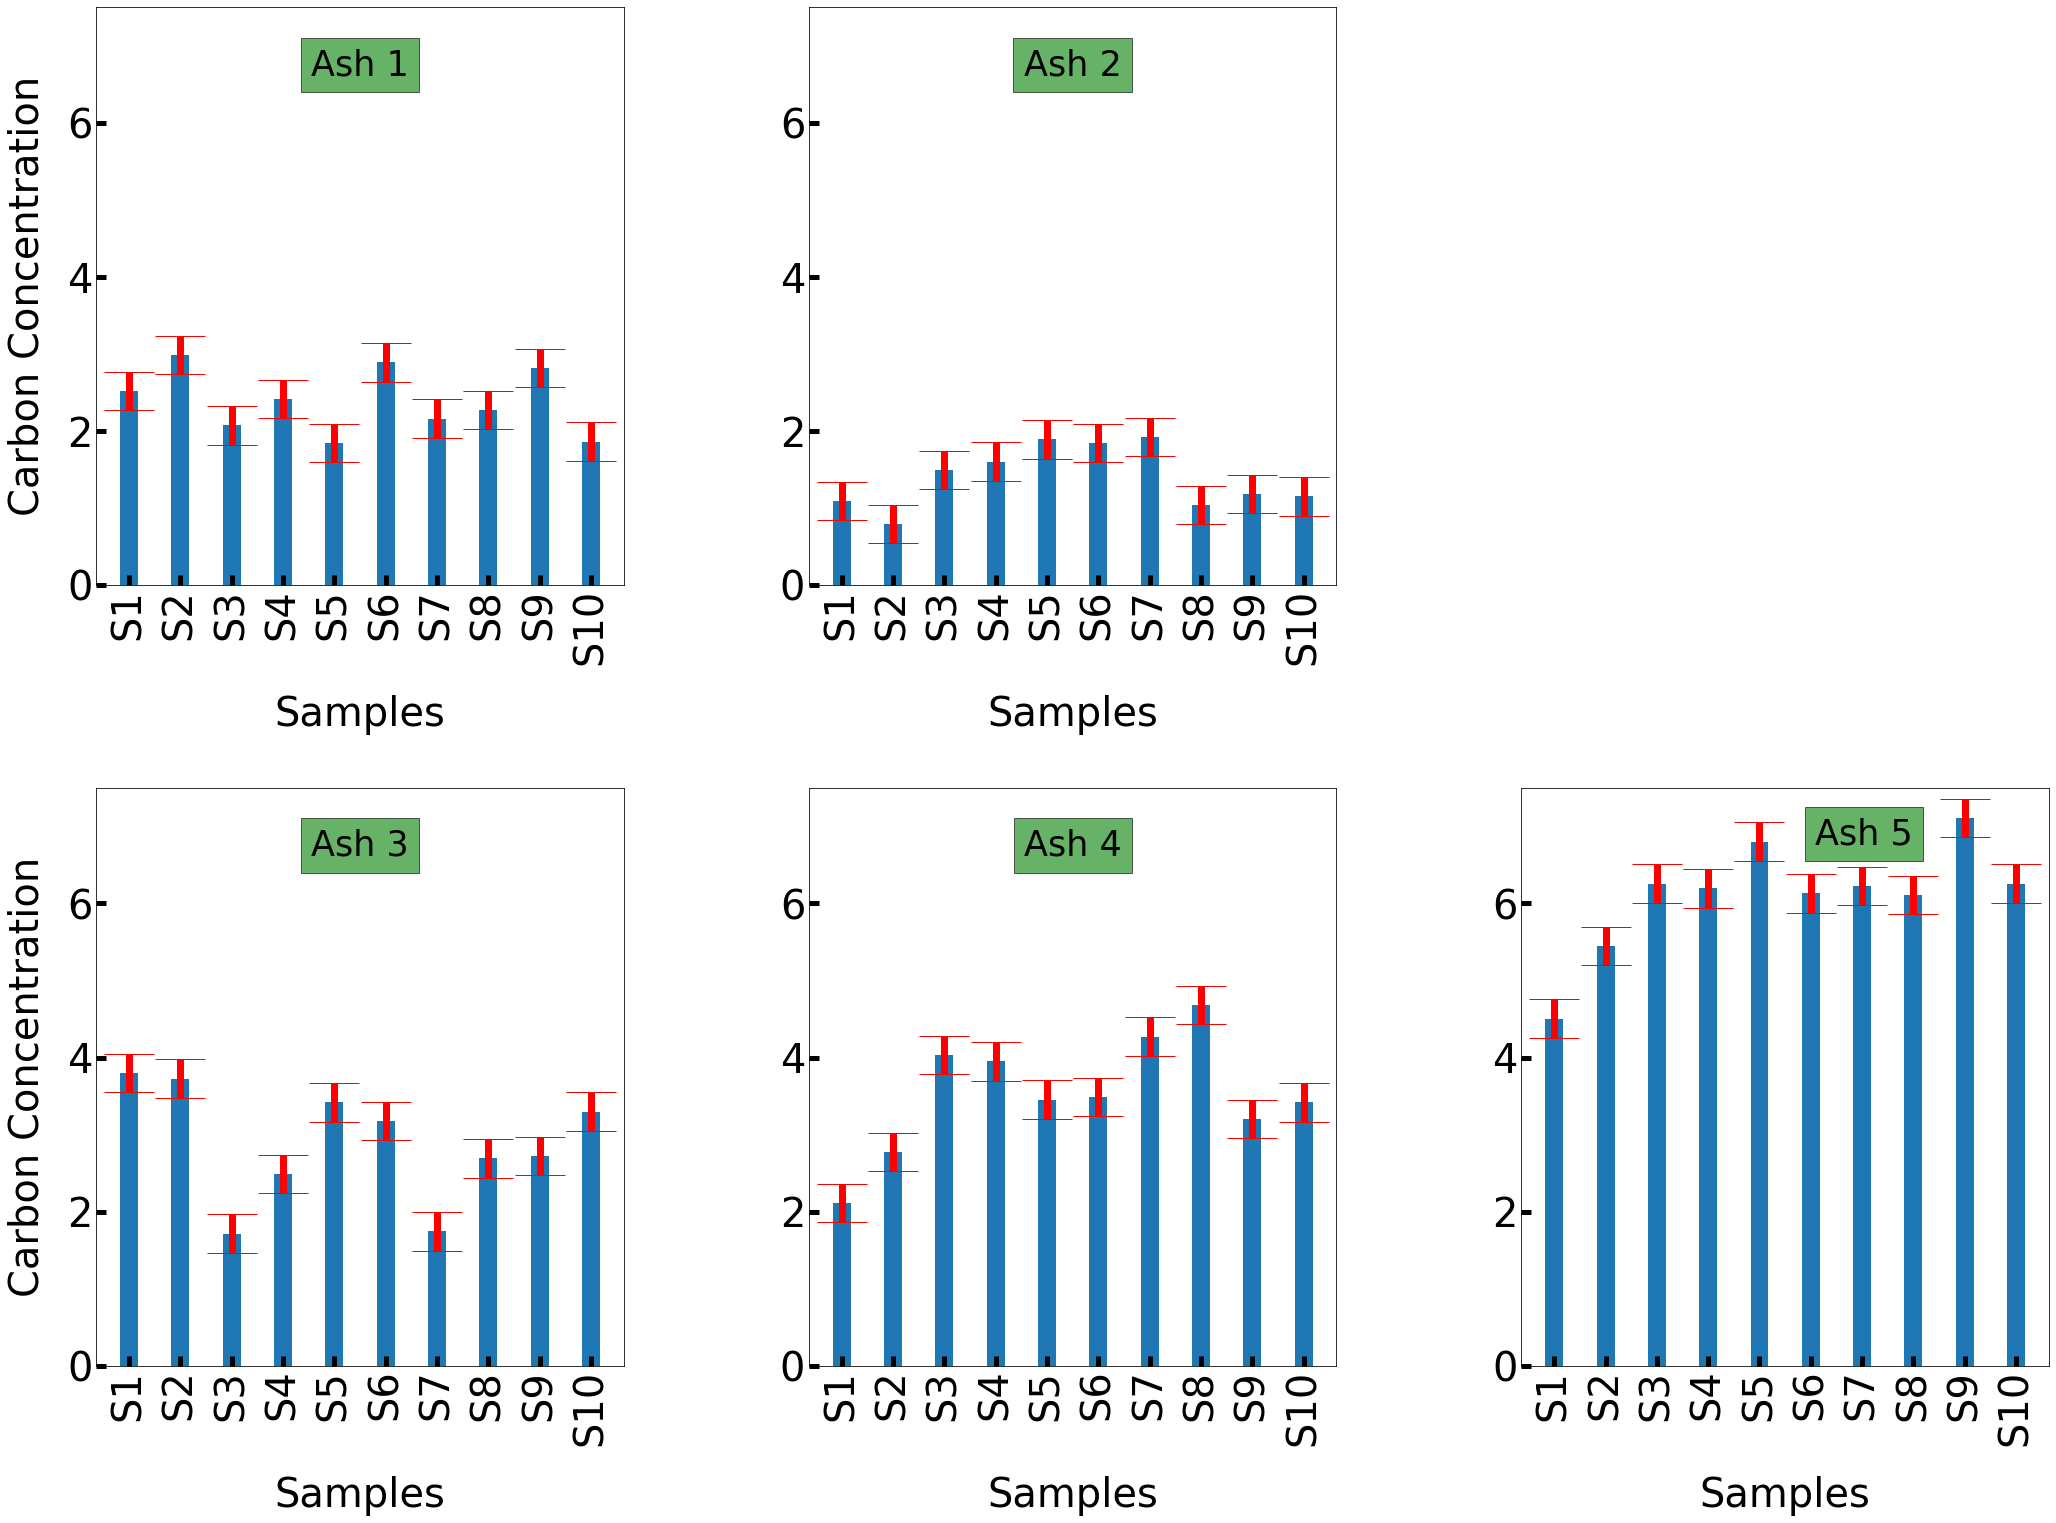

In [139]:
#load data 
df_C = pd.read_csv('C_corrections.csv')
df_N = pd.read_csv('N_corrections.csv')
#create figure
fig,ax = plt.subplots(2,3)
fig.set_size_inches(35, 25)
fig.subplots_adjust(hspace=.35,wspace = .35)
t1 = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7','S8','S9','S10']
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = ax[0,0].bar(t1, df_C[40:51]['corrected C'].tolist(), width)
ax[0, 2].axis('off')
ax[0,0].set_ylim(0,7.5)
ax[0,0].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[0,0].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[0,0].set_xlabel('Samples', size=40,labelpad=30)
ax[0,0].set_ylabel('Carbon Concentration', size=40,labelpad=20)
#ax1.title('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[0,0].text(.50, .90, 'Ash 1', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[0,0].errorbar(range(len(t1)),df_C[40:51]['corrected C'].tolist(), yerr = 0.249, fmt="o", color="r", lw=7,capsize=25)
ax[0,1].set_ylim(0,7.5)
p1 = ax[0,1].bar(t1, df_C[30:40]['corrected C'].tolist(), width)
ax[0,1].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[0,1].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[0,1].set_xlabel('Samples', size=40,labelpad=30)
#ax1.title('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[0,1].text(.50, .90, 'Ash 2', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,1].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[0,1].errorbar(range(len(t1)), df_C[30:40]['corrected C'].tolist(), yerr = 0.249, fmt="o", color="r", lw=7,capsize=25)
ax[1,0].set_ylim(0,7.5)
p1 = ax[1,0].bar(t1, df_C[20:30]['corrected C'].tolist(), width)
ax[1,0].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[1,0].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[1,0].set_xlabel('Samples', size=40,labelpad=30)
ax[1,0].set_ylabel('Carbon Concentration', size=40,labelpad=20)
ax[1,0].text(.50, .90, 'Ash 3', horizontalalignment='center',
             verticalalignment='center', transform=ax[1,0].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[1,0].errorbar(range(len(t1)), df_C[20:30]['corrected C'].tolist(), yerr = 0.249, fmt="o", color="r", lw=7,capsize=25)
p1 = ax[1,1].bar(t1,  df_C[10:20]['corrected C'].tolist(), width)
ax[1,1].set_ylim(0,7.5)
ax[1,1].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[1,1].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[1,1].set_xlabel('Samples', size=40,labelpad=30)
#ax1.itle('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[1,1].text(.50, .90, 'Ash 4', horizontalalignment='center',
             verticalalignment='center', transform=ax[1,1].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[1,1].errorbar(range(len(t1)), df_C[10:20]['corrected C'].tolist(), yerr = 0.249, fmt="o", color="r", lw=7,capsize=25)
ax[1,2].set_ylim(0,7.5)
p1 = ax[1,2].bar(t1, df_C[0:10]['corrected C'].tolist(), width)
ax[1,2].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[1,2].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[1,2].set_xlabel('Samples', size=40,labelpad=30)
#ax1.itle('A. K$^{+}$ Concentration vs. Time After Second Storm', size=35)
ax[1,2].text(.65, .92, 'Ash 5', horizontalalignment='center',
             verticalalignment='center', transform=ax[1,2].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[1,2].errorbar(range(len(t1)), df_C[0:10]['corrected C'].tolist(), yerr = 0.249, fmt="o", color="r", lw=7,capsize=25)
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/FigureS6.pdf')
plt.show()

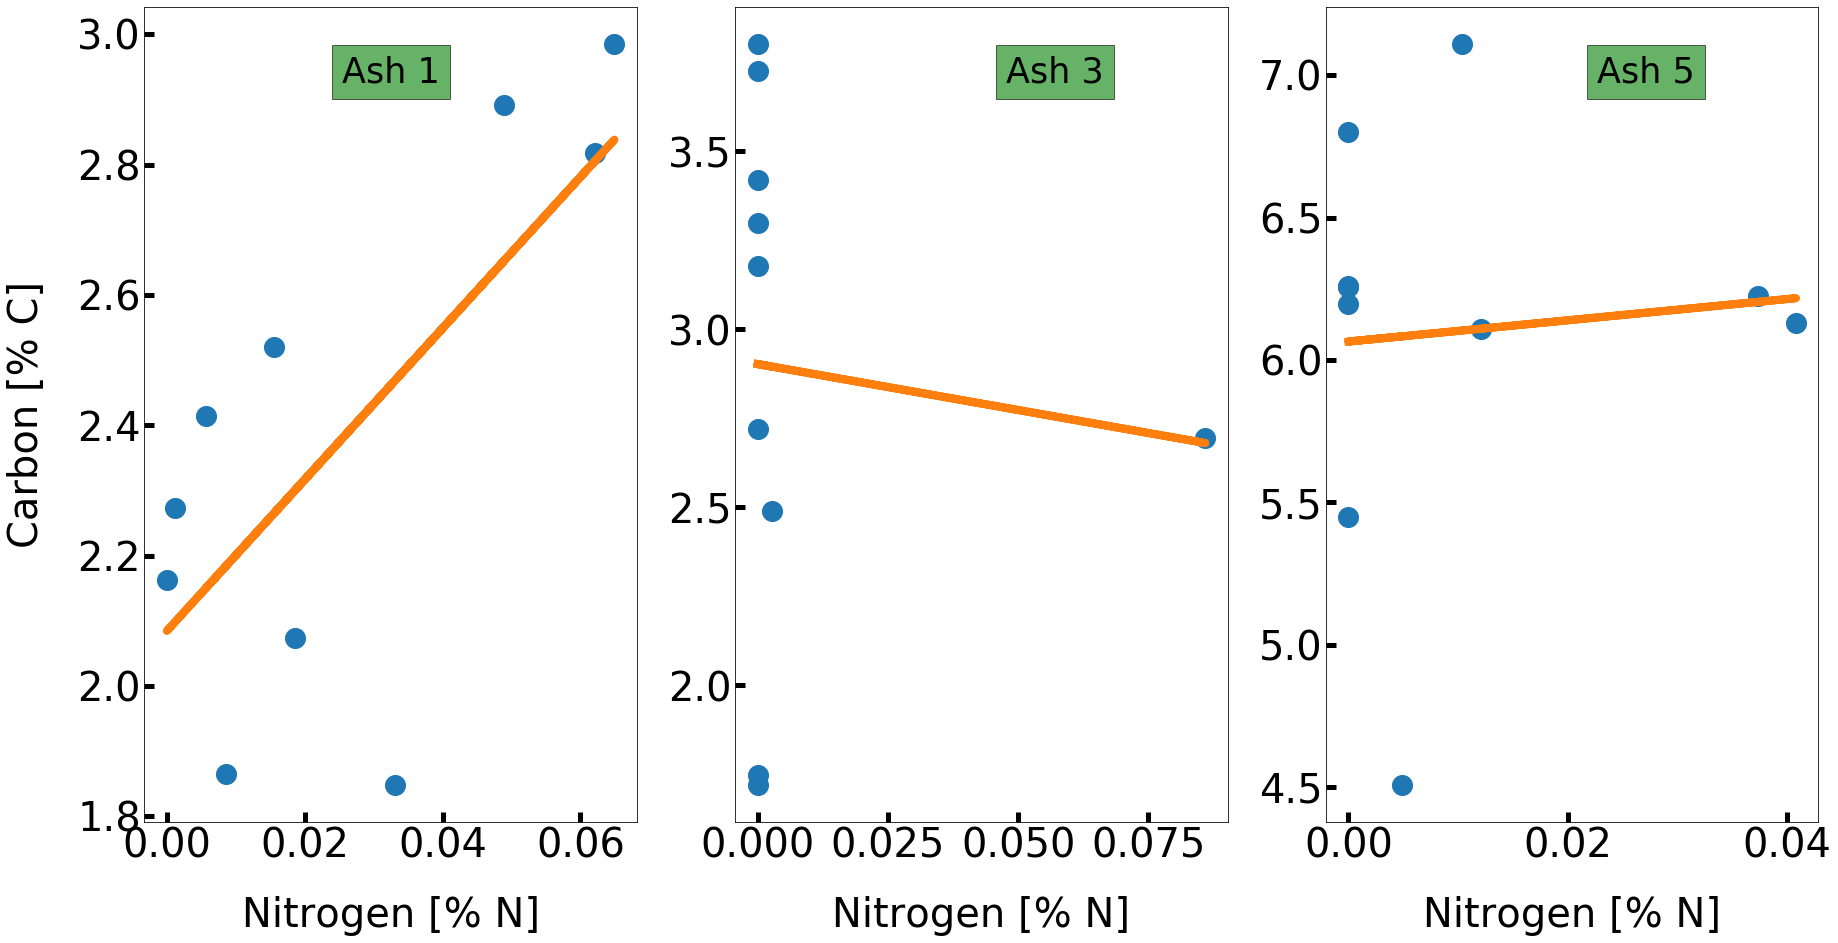

In [140]:
#load data 
df_C = pd.read_csv('C_corrections.csv')
df_N = pd.read_csv('N_corrections.csv')
#create figure
fig,ax = plt.subplots(1,3)
fig.set_size_inches(30, 15)
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    #Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    return results
m, b = np.polyfit(df_N[40:51]['corrected N'].tolist(),df_C[40:51]['corrected C'].tolist(), 1)
results = polyfit(df_N[40:51]['corrected N'].tolist(),df_C[40:51]['corrected C'].tolist(), 1)
ax[0].plot(df_N[40:51]['corrected N'].tolist(), df_C[40:51]['corrected C'].tolist(), 'o',markersize = 20)
l =  [(i * m) + b for i in df_N[40:51]['corrected N'].tolist()]
ax[0].plot(df_N[40:51]['corrected N'].tolist(), l,linewidth = 8)
ax[0].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[0].tick_params(axis="x", labelsize=40,length = 10, width = 5, direction = "in")
ax[0].set_xlabel('Nitrogen [% N]', size=40,labelpad=30)
ax[0].set_ylabel('Carbon [% C]', size=40,labelpad=30)
ax[0].text(.50, .92, 'Ash 1', horizontalalignment='center',
             verticalalignment='center', transform=ax[0].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
m, b = np.polyfit(df_N[20:30]['corrected N'].tolist(), df_C[20:30]['corrected C'].tolist(), 1)
results = polyfit(df_N[20:30]['corrected N'].tolist(), df_C[20:30]['corrected C'].tolist(), 1)
ax[1].plot(df_N[20:30]['corrected N'].tolist(), df_C[20:30]['corrected C'].tolist(), 'o',markersize = 20)
l =  [(i * m) + b for i in df_N[20:30]['corrected N'].tolist()]
ax[1].plot(df_N[20:30]['corrected N'].tolist(), l,linewidth = 8)
ax[1].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[1].tick_params(axis="x", labelsize=40,length = 10, width = 5, direction = "in")
ax[1].set_xlabel('Nitrogen [% N]', size=40,labelpad=30)
ax[1].text(.65, .92, 'Ash 3', horizontalalignment='center',
             verticalalignment='center', transform=ax[1].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
m, b = np.polyfit(df_N[0:10]['corrected N'].tolist(), df_C[0:10]['corrected C'].tolist(), 1)
results = polyfit(df_N[0:10]['corrected N'].tolist(), df_C[0:10]['corrected C'].tolist(), 1)
ax[2].plot(df_N[0:10]['corrected N'].tolist(), df_C[0:10]['corrected C'].tolist(), 'o',markersize = 20)
l =  [(i * m) + b for i in df_N[0:10]['corrected N'].tolist()]
ax[2].plot(df_N[0:10]['corrected N'].tolist(), l,linewidth = 8)
ax[2].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[2].tick_params(axis="x", labelsize=40,length = 10, width = 5, direction = "in")
ax[2].set_xlabel('Nitrogen [% N]', size=40,labelpad=30)
ax[2].text(.65, .92, 'Ash 5', horizontalalignment='center',
             verticalalignment='center', transform=ax[2].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/FigureS4.pdf')
plt.show()

Figure S4: Carbon-nitrogen correlation at sites 1,3, and 5

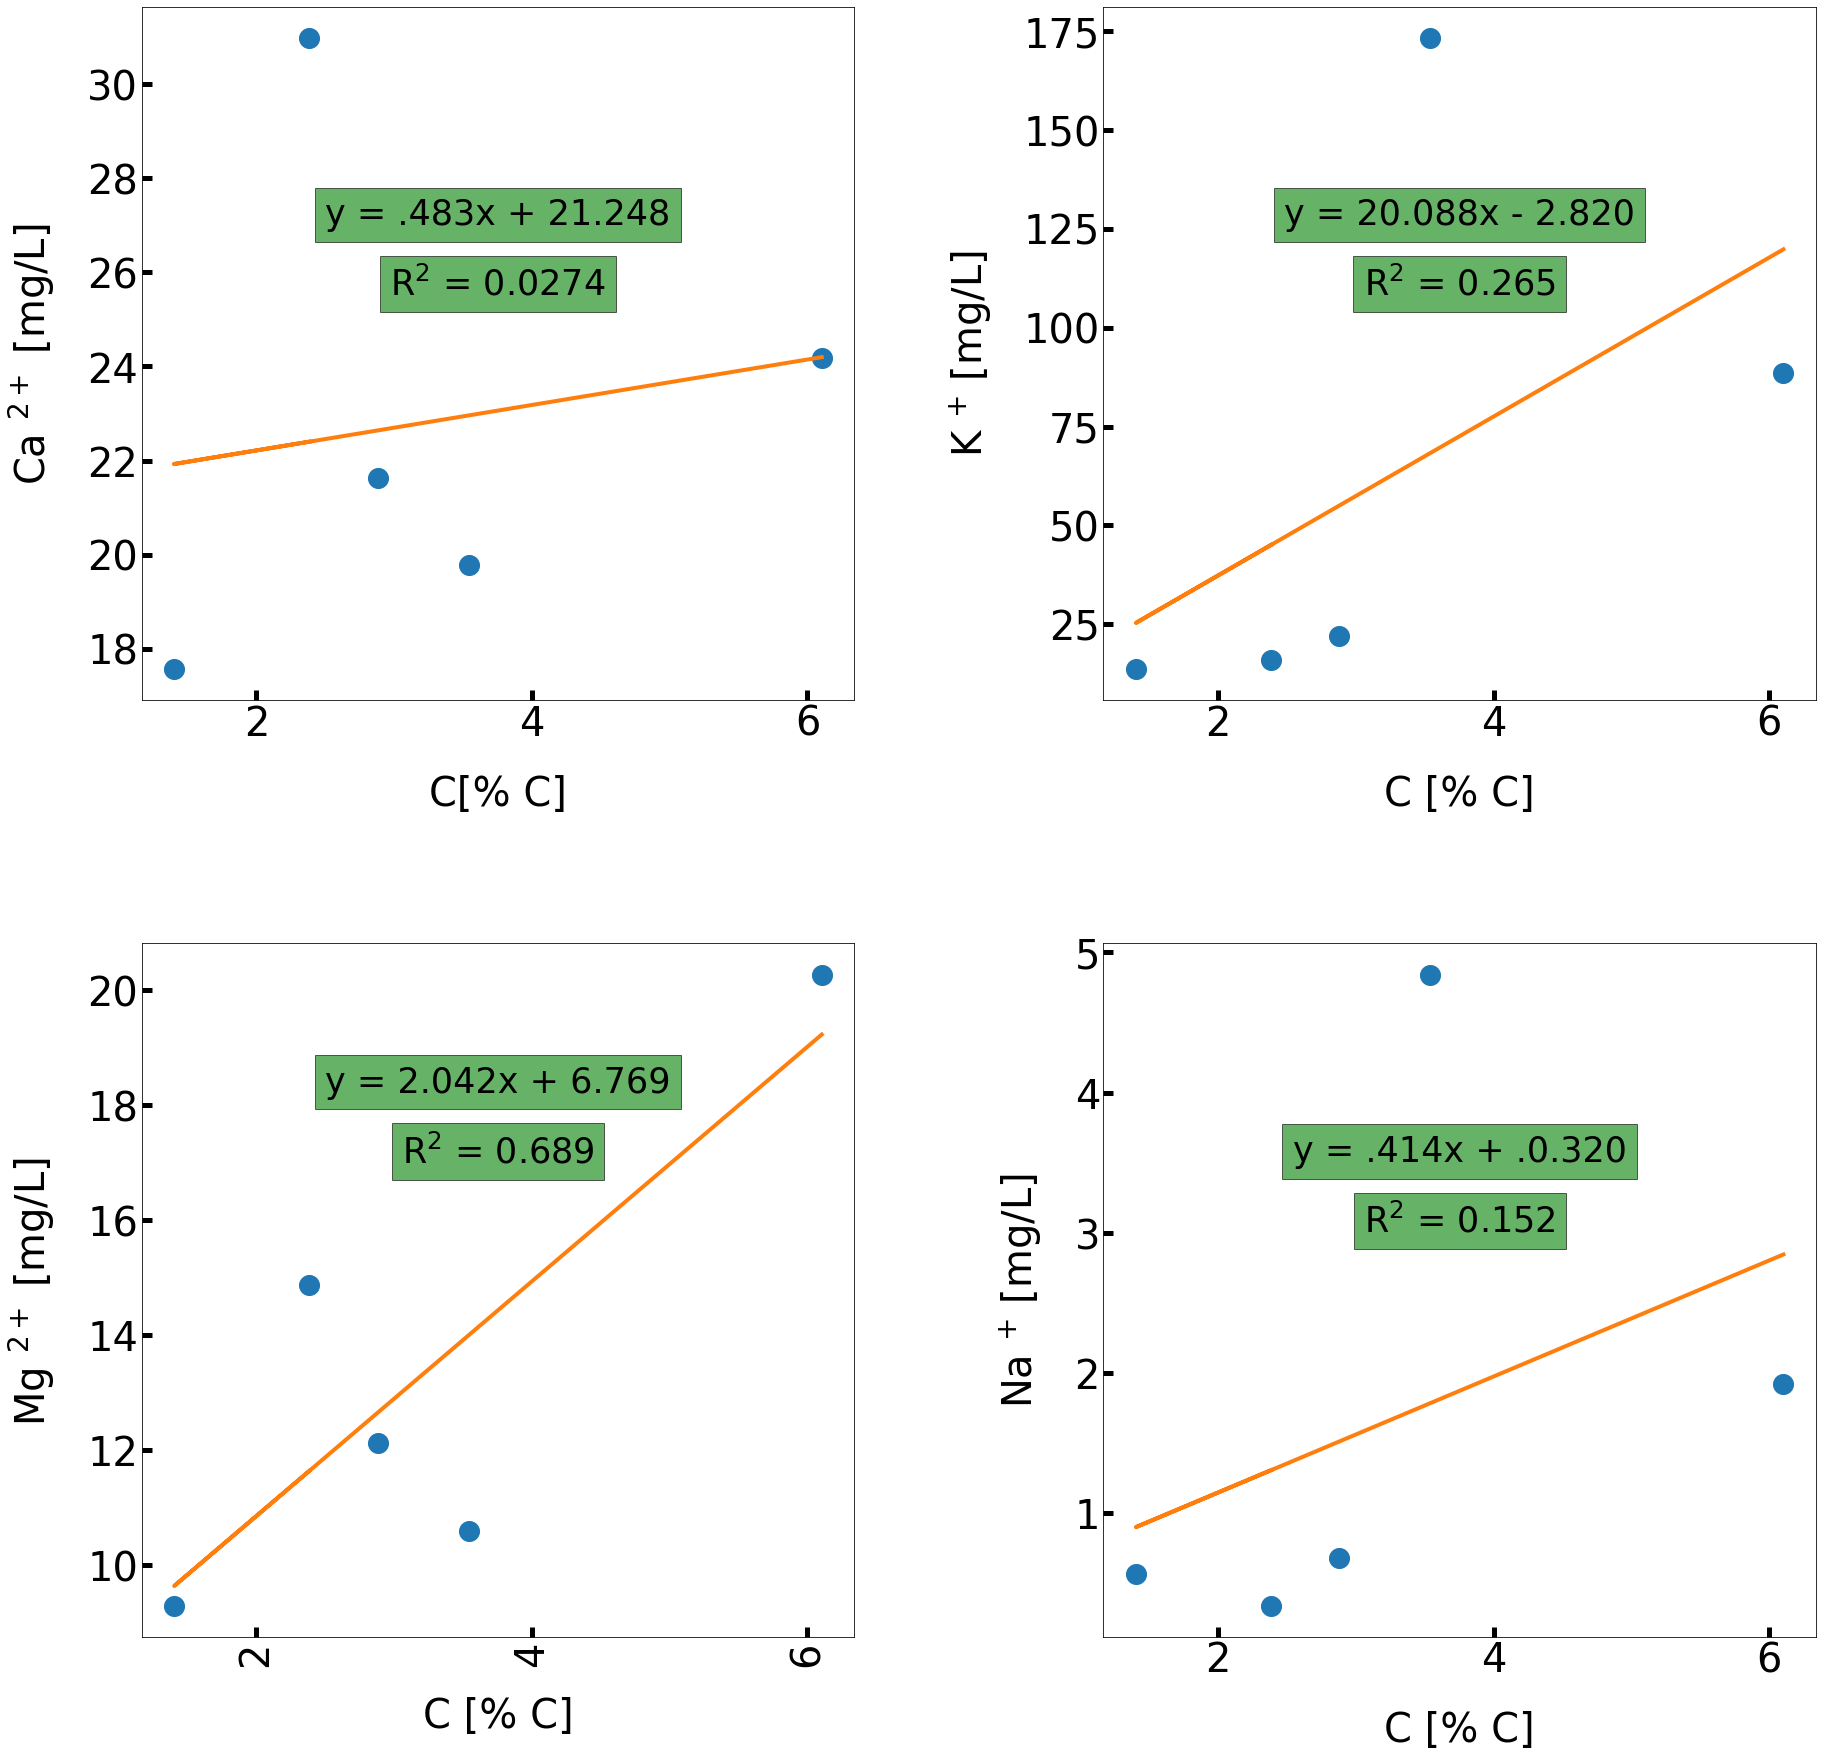

In [141]:
#load data 
df_C = pd.read_csv('C_corrections.csv')
df_N = pd.read_csv('N_corrections.csv')
#create figure
fig,ax = plt.subplots(2,2)
fig.set_size_inches(30, 30)
fig.subplots_adjust(hspace=.35,wspace = .35)
#define variable for each bag
b5 = df_C[0:10]['corrected C'].tolist()   #5
b4 = df_C[10:20]['corrected C'].tolist()   #4
b3 = df_C[20:30]['corrected C'].tolist()   #3
b2 = df_C[30:40]['corrected C'].tolist()   #2
b1 = df_C[40:51]['corrected C'].tolist()  #1
Cavg_list = [sum(b1)/len(b1),sum(b2)/len(b2),sum(b3)/len(b3),sum(b4)/len(b4),sum(b5)/len(b5)]
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    #Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    return results
m, b = np.polyfit(Cavg_list, df2['Ca'].tolist(), 1)
results = polyfit(Cavg_list, df2['Ca'].tolist(), 1)
l =  [(i * m) + b for i in Cavg_list]
ax[0,0].plot(Cavg_list,df2['Ca'].tolist(), 'o',markersize = 20)
ax[0,0].plot(Cavg_list, l,linewidth = 4)
ax[0,0].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[0,0].tick_params(axis="x", labelsize=40,length = 10, width = 5, direction = "in")
ax[0,0].set_xlabel('C[% C]', size=40,labelpad=30)
ax[0,0].set_ylabel('Ca $^{2+}$ [mg/L]', size=40,labelpad=30)
ax[0,0].text(.5,.7, 'y = .483x + 21.248', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[0,0].text(.5,.6, 'R$^{2}$ = 0.0274', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,0].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
m, b = np.polyfit(Cavg_list, df2['K'].tolist(), 1)
results = polyfit(Cavg_list, df2['K'].tolist(), 1)
l =  [(i * m) + b for i in Cavg_list]
ax[0,1].plot(Cavg_list,df2['K'].tolist(), 'o',markersize = 20)
ax[0,1].plot(Cavg_list, l,linewidth = 4)
ax[0,1].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[0,1].tick_params(axis="x", labelsize=40,length = 10, width = 5, direction = "in")
ax[0,1].set_xlabel('C [% C]', size=40,labelpad=30)
ax[0,1].set_ylabel('K $^{+}$ [mg/L]', size=40,labelpad=30)

ax[0,1].text(.5, .7, 'y = 20.088x - 2.820', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,1].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[0,1].text(.5, .6, 'R$^{2}$ = 0.265', horizontalalignment='center',
             verticalalignment='center', transform=ax[0,1].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
m, b = np.polyfit(Cavg_list, df2['Mg'].tolist(), 1)
results = polyfit(Cavg_list, df2['Mg'].tolist(), 1)
l =  [(i * m) + b for i in Cavg_list]
ax[-1,0].plot(Cavg_list,df2['Mg'].tolist(), 'o',markersize = 20)
ax[-1,0].plot(Cavg_list, l,linewidth = 4)
ax[-1,0].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[-1,0].tick_params(axis="x", labelsize=40,rotation = 90,length = 10, width = 5, direction = "in")
ax[-1,0].set_xlabel('C [% C]', size=40,labelpad=30)
ax[-1,0].set_ylabel('Mg $^{2+}$ [mg/L]', size=40,labelpad=30)

ax[-1,0].text(.5, .8, 'y = 2.042x + 6.769', horizontalalignment='center',
             verticalalignment='center', transform=ax[-1,0].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[-1,0].text(.5,.7, 'R$^{2}$ = 0.689', horizontalalignment='center',
             verticalalignment='center', transform=ax[-1,0].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
m, b = np.polyfit(Cavg_list, df2['Na'].tolist(), 1)
results = polyfit(Cavg_list, df2['Na'].tolist(), 1)
l =  [(i * m) + b for i in Cavg_list]
ax[-1,1].plot(Cavg_list,df2['Na'].tolist(), 'o',markersize = 20)
ax[-1,1].plot(Cavg_list, l,linewidth = 4)
ax[-1,1].tick_params(axis="y", labelsize=40,length = 10, width = 5, direction = "in")
ax[-1,1].tick_params(axis="x", labelsize=40,length = 10, width = 5, direction = "in")
ax[-1,1].set_xlabel('C [% C]', size=40,labelpad=30)
ax[-1,1].set_ylabel('Na $^{+}$ [mg/L]', size=40,labelpad=30)

ax[-1,1].text(.5, .7, 'y = .414x + .0.320', horizontalalignment='center',
             verticalalignment='center', transform=ax[-1,1].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
ax[-1,1].text(.5,.6, 'R$^{2}$ = 0.152', horizontalalignment='center',
             verticalalignment='center', transform=ax[-1,1].transAxes,
             fontsize = 35, bbox ={'facecolor':'green', 
                'alpha':0.6, 
                'pad':10}) 
plt.savefig('/Users/parkershankin-clarke/Desktop/figs/FigureS5.pdf')
plt.show()

In [142]:
#compute correlation between calcium + magnesium and pottasium at middle and lower el cap respectively 
df_MC = df[13:17]['Ca']
df_LC = df[18:]['Ca']
df_MM = df[13:17]['Mg']
df_LM = df[18:]['Mg']
df_MK = df[13:17]['K']
df_LK = df[18:]['K']
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    #Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    #r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    return results
resultsM =  polyfit(x = df_MC + df_MM, y = df_MK , degree = 1)
resultsL = polyfit(x = df_LC + df_LM, y = df_LK , degree = 1)
print(resultsM)
print(resultsL)

{'polynomial': [-0.03317830965223396, 10.047959467615982], 'determination': 0.7071299712526492}
{'polynomial': [-0.008717710378969994, 6.869162685690913], 'determination': 0.2694471548823211}
